<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/main/ArielChernyy/Inspectrum_clinic_new_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [553]:
import numpy as np
import pandas as pd
import xlrd
import copy
import pickle
import os
import json
import re
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from scipy.spatial import distance

import xgboost as xgb
import lightgbm as lgbm

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
#from keras.wrappers.scikit_learn import KerasClassifier


In [258]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [259]:
from scikeras.wrappers import KerasClassifier

In [260]:
#from google.colab import drive
#drive.mount('/content/Drive/')

# Загрузка и первичный анализ

In [261]:
#data = pd.read_excel('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D1%81%D0%B5%D0%BC%D0%BF%D0%BB%20%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0.xlsx')

# новый датасет
data = pd.read_excel('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx')

In [262]:
data.shape

(1982, 4587)

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Columns: 4587 entries, ДокументПрохождениеМедосмотра to Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
dtypes: bool(1), datetime64[ns](43), float64(1253), object(3290)
memory usage: 69.3+ MB


In [264]:
data.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,Оториноларингология3_Аудиометрия1_Значение,Оториноларингология3_Аудиометрия1_ЗначениеПредставление,Оториноларингология1_ЖалобыДополнение_Значение,Оториноларингология1_ЖалобыДополнение_ЗначениеПредставление,Стоматология2_ВП2_Значение,Стоматология2_ВП2_ЗначениеПредставление,Терапия2_ЗаключениеФОГК_Значение,Терапия2_ЗаключениеФОГК_ЗначениеПредставление,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_ЗначениеПредставление
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Пустые значения

In [265]:
n_na = data.isna().sum()

In [266]:
print(n_na.sort_values())

ДокументПрохождениеМедосмотра                             0
Клиент                                                    0
КлиентДатаРождения                                        0
КлиентПол                                                 0
КлиентПолПредставление                                    0
                                                       ... 
ПсихиатрияНаркология1_Противопоказание2                1982
ПсихиатрияНаркология1_Классификация3Представление2     1982
ПсихиатрияНаркология1_Классификация32                  1982
УЗИДиагностика2_Классификация1Представление2           1982
ПроцедурнаяМедсестра1_ХР_Рекомендация2Представление    1982
Length: 4587, dtype: int64


In [267]:
print(n_na.value_counts().sort_index(ascending=False))

1982    884
1981    350
1980    589
1979     79
1978     87
       ... 
241       5
240      11
237       1
236       3
0        12
Length: 291, dtype: int64


In [268]:
data[n_na[n_na==0].index.tolist()].head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,Профессия,ВредныеФакторы
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,Ведущий специалист по организации обуения,11.4
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Ведущий специалист,4.2.5
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Главный менеджер,4.2.5
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Главный специалист,11.1
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Старший специалист,11.1


In [269]:
print(f'{n_na.value_counts().sort_index(ascending=False)[1982]} колонок с только пустыми значениями',
      f'{n_na.value_counts().sort_index(ascending=False)[1981]} колонок с 1 непустым значением',
      f'{n_na.value_counts().sort_index(ascending=False)[1980]} колонок с 2 непустыми значениями', 
      sep = '\n')

884 колонок с только пустыми значениями
350 колонок с 1 непустым значением
589 колонок с 2 непустыми значениями


#### (!) в примере датасета много пустых или почти пустых (1 или 2 непустых значения) колонок. хотелось бы отбросить их, но неизвестно, будут ли они пустыми в полном датасете. 

#### (!) пока не удаляю пустые столбцы, т.к. хочу дальше поискать способ обработки столбцов по группам

In [270]:
full_columns = n_na[n_na == 0].index.tolist()
full_columns

['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Профессия',
 'ВредныеФакторы']

# Группы факторов

буду собирать обработанные (готовые к подаче в нейронку) факторы в DataFrame X, обработанную зависимую переменную положу в DataFrame target

In [271]:
X = pd.DataFrame(index=data.index)

In [272]:
cols_no_digits = []
cols_w_digits = []
for x in data.columns:
  if len(re.findall(r'\d', x)) > 0:
    cols_w_digits.append(x)
  else:
    cols_no_digits.append(x)
print(len(cols_no_digits), len(cols_w_digits))

18 4569


In [273]:
print(cols_no_digits)

['ДокументПрохождениеМедосмотра', 'Клиент', 'КлиентДатаРождения', 'КлиентПол', 'КлиентПолПредставление', 'ДатаЗавершенияМедосмотра', 'ТипМедосмотра', 'ТипМедосмотраПредставление', 'ПсихОсвидетельствование', 'Контрагент', 'Цех', 'Профессия', 'ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение', 'ДиспансернаяГруппа', 'ДиспансернаяГруппаПредставление', 'ВредныеФакторы']


In [274]:
data[cols_no_digits].head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,Цех,Профессия,ЗаключениеМК,ЗаключениеМКПредставление,Заключение,ДиспансернаяГруппа,ДиспансернаяГруппаПредставление,ВредныеФакторы
0,7f41ca7e-7dac-11ec-80fc-0cc47aab8067,c91e3407-b81f-11e9-80cf-0cc47aab8067,1976-10-24,Женский,Женский,2022-01-25,Периодический,Периодический,False,23c173a7-30d9-11e7-80d8-708bcd7f83cd,NaN,Ведущий специалист по организации обуения,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях,I,I,11.4
1,2ee1f9ac-83dd-11ec-80fc-0cc47aab8067,1a1a5fea-8b7f-11eb-80e8-0cc47aab8067,1987-11-18,Мужской,Мужской,2022-02-02,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,NaN,Ведущий специалист,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях,IIIа,IIIа,4.2.5
2,9cbb191e-8e24-11ec-80fe-0cc47aab8067,7fe324e0-fa51-11eb-80f6-0cc47aab8067,1985-09-08,Мужской,Мужской,2022-02-15,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,NaN,Главный менеджер,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...,II,II,4.2.5
3,b8a33910-8eec-11ec-80fe-0cc47aab8067,98f9d761-8d65-11ec-80fe-0cc47aab8067,1988-04-25,Мужской,Мужской,2022-02-16,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Отдел техники и технологии строительства скважин,Главный специалист,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях,I,I,11.1
4,0bb0d181-938c-11ec-80fe-0cc47aab8067,009aac7d-7bcf-11eb-80e8-0cc47aab8067,1984-04-17,Мужской,Мужской,2022-02-22,Периодический,Периодический,False,a6d559b0-7835-11eb-80e8-0cc47aab8067,Отдел технологий текущего и капитального ремон...,Старший специалист,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...,II,II,11.1


### обработка столбца "вредные факторы"

In [275]:
factors_list = []
for elem in data['ВредныеФакторы']:
  factors_list += elem.split(',')
factors_list = list(set(factors_list))
factors_list

['1.37',
 '4.6',
 '1.29',
 '10',
 '1.34.1',
 '4.8',
 '1.17',
 '1.2',
 '3.1.8.1',
 '1.3',
 '3.1',
 '18.2',
 '1.29.1',
 '18.1',
 '1.1',
 '6.2',
 '3.1.2',
 '4.10',
 '1.8.3',
 '4.4',
 '1.8.2.1',
 '1.36.1',
 '5.1',
 '24',
 '1.24',
 '1.29.2',
 '1.50',
 '9',
 '11.2',
 '27',
 '4.5',
 '1.19.1',
 '1.37.1',
 '3.1.7',
 '22',
 '4.9',
 '1.18.3',
 '4.3.1',
 '11.4',
 '3.4',
 '4.2.3',
 '1.8.2',
 '1.23',
 '1.46',
 '1.39',
 '5.2',
 'IIIа',
 '12',
 '11',
 '1.49.2',
 '23',
 '17',
 '1.45.1',
 '4.2.1',
 '4.3.2',
 '3.1.8.3',
 '13',
 '1.49.14',
 '15',
 '2.4',
 '25',
 '2.4.3',
 '1.14.1',
 '4.2',
 '1.14.2',
 '1.49',
 '5.2.1',
 '4.1',
 '1.8.1.2',
 '1.8.1.1',
 '1.8.3.2',
 '1.8.2.2',
 '4.2.5',
 '1.37.1.1',
 '4.2.4',
 'II',
 '1.48',
 'Годен к работе в указанных условиях',
 '1.8.1',
 '11.3',
 '1.15',
 '1.8.3.1',
 '14',
 '1.29.4',
 '11.1',
 '26',
 '6',
 '6.1',
 '4.7',
 '1.37.1.2',
 '8',
 '18',
 '1.30.1',
 '1.36',
 '3.1.8.2']

#### (!) кажется, все-таки и в новом датасете есть ошибки в выгрузке.

In [276]:
data[['Клиент', 'ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение', 'ВредныеФакторы']][data['ВредныеФакторы'].str.contains('Годен к работе в указанных условиях')|data['ВредныеФакторы'].str.contains('II')|data['ВредныеФакторы'].str.contains('IIIа')]

,Клиент,ЗаключениеМК,ЗаключениеМКПредставление,Заключение,ВредныеФакторы
843,956edb54-4047-11ec-80fa-0cc47aab8067,машинист бульдозера,тракторист,стропальщик,Годен к работе в указанных условиях
851,725f3c56-e14d-11e7-80de-708bcd7f83cd,Газоспасатель,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,IIIа
1022,60653387-410f-11ec-80fa-0cc47aab8067,Газоспасатель,Годен,Годен к работе в указанных условиях,II
1024,abe3549b-4042-11ec-80fa-0cc47aab8067,Газоспасатель,Годен,Годен к работе в указанных условиях,II


In [277]:
# оставляю среди вредных факторов только правильно закодированные
factors_list = sorted([x for x in factors_list if len(re.findall(r'\d',x))>0], key = lambda x: [int(s) for s in x.split('.')])
print(len(factors_list))
factors_list

92


['1.1',
 '1.2',
 '1.3',
 '1.8.1',
 '1.8.1.1',
 '1.8.1.2',
 '1.8.2',
 '1.8.2.1',
 '1.8.2.2',
 '1.8.3',
 '1.8.3.1',
 '1.8.3.2',
 '1.14.1',
 '1.14.2',
 '1.15',
 '1.17',
 '1.18.3',
 '1.19.1',
 '1.23',
 '1.24',
 '1.29',
 '1.29.1',
 '1.29.2',
 '1.29.4',
 '1.30.1',
 '1.34.1',
 '1.36',
 '1.36.1',
 '1.37',
 '1.37.1',
 '1.37.1.1',
 '1.37.1.2',
 '1.39',
 '1.45.1',
 '1.46',
 '1.48',
 '1.49',
 '1.49.2',
 '1.49.14',
 '1.50',
 '2.4',
 '2.4.3',
 '3.1',
 '3.1.2',
 '3.1.7',
 '3.1.8.1',
 '3.1.8.2',
 '3.1.8.3',
 '3.4',
 '4.1',
 '4.2',
 '4.2.1',
 '4.2.3',
 '4.2.4',
 '4.2.5',
 '4.3.1',
 '4.3.2',
 '4.4',
 '4.5',
 '4.6',
 '4.7',
 '4.8',
 '4.9',
 '4.10',
 '5.1',
 '5.2',
 '5.2.1',
 '6',
 '6.1',
 '6.2',
 '8',
 '9',
 '10',
 '11',
 '11.1',
 '11.2',
 '11.3',
 '11.4',
 '12',
 '13',
 '14',
 '15',
 '17',
 '18',
 '18.1',
 '18.2',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27']

In [278]:
X_adverse_factors = pd.DataFrame({'adverse_factor_' + elem: data['ВредныеФакторы'].apply(lambda x: 1 if elem in x.split(',') else 0) for elem in factors_list}, index = data.index)
print(X_adverse_factors.shape)
X_adverse_factors

(1982, 92)


,adverse_factor_1.1,adverse_factor_1.2,adverse_factor_1.3,adverse_factor_1.8.1,adverse_factor_1.8.1.1,adverse_factor_1.8.1.2,adverse_factor_1.8.2,adverse_factor_1.8.2.1,adverse_factor_1.8.2.2,adverse_factor_1.8.3,...,adverse_factor_17,adverse_factor_18,adverse_factor_18.1,adverse_factor_18.2,adverse_factor_22,adverse_factor_23,adverse_factor_24,adverse_factor_25,adverse_factor_26,adverse_factor_27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [279]:
X_adverse_factors.sum(axis=1)[X_adverse_factors.sum(axis=1)==0]

843     0
851     0
1022    0
1024    0
dtype: int64

In [280]:
X_adverse_factors.sum().sort_values()

adverse_factor_1.8.3      1
adverse_factor_2.4        1
adverse_factor_2.4.3      1
adverse_factor_1.36       1
adverse_factor_1.46       1
                       ... 
adverse_factor_5.1      351
adverse_factor_6.1      351
adverse_factor_4.2.5    356
adverse_factor_4.4      432
adverse_factor_11.1     523
Length: 92, dtype: int64

In [281]:
adverse_factors_aux_info = pd.DataFrame(X_adverse_factors.sum(), columns = ['n_occurences'])
adverse_factors_aux_info.sort_values('n_occurences')

,n_occurences
adverse_factor_1.8.3,1
adverse_factor_2.4,1
adverse_factor_2.4.3,1
adverse_factor_1.36,1
adverse_factor_1.46,1
...,...
adverse_factor_5.1,351
adverse_factor_6.1,351
adverse_factor_4.2.5,356
adverse_factor_4.4,432


In [282]:
for i in np.arange(0.1,1,0.1):
  print(f'{int(np.round(i*100,0))}% вредных факторов встречаются не более чем у {np.round(adverse_factors_aux_info.quantile(i).values[0]/len(data)*100,1)} % осмотренных')

10% вредных факторов встречаются не более чем у 0.1 % осмотренных
20% вредных факторов встречаются не более чем у 0.1 % осмотренных
30% вредных факторов встречаются не более чем у 0.3 % осмотренных
40% вредных факторов встречаются не более чем у 0.5 % осмотренных
50% вредных факторов встречаются не более чем у 0.9 % осмотренных
60% вредных факторов встречаются не более чем у 1.6 % осмотренных
70% вредных факторов встречаются не более чем у 2.6 % осмотренных
80% вредных факторов встречаются не более чем у 4.2 % осмотренных
90% вредных факторов встречаются не более чем у 9.5 % осмотренных


In [283]:
X_adverse_factors.sum()[X_adverse_factors.sum()<0.009*len(data)]

adverse_factor_1.2          4
adverse_factor_1.8.1        1
adverse_factor_1.8.2        1
adverse_factor_1.8.2.1     15
adverse_factor_1.8.2.2      7
adverse_factor_1.8.3        1
adverse_factor_1.8.3.1      7
adverse_factor_1.8.3.2      7
adverse_factor_1.14.1       2
adverse_factor_1.15        10
adverse_factor_1.17         2
adverse_factor_1.18.3      11
adverse_factor_1.23         8
adverse_factor_1.24         3
adverse_factor_1.29         1
adverse_factor_1.29.4       9
adverse_factor_1.36         1
adverse_factor_1.37         4
adverse_factor_1.37.1.1     6
adverse_factor_1.37.1.2     2
adverse_factor_1.45.1       2
adverse_factor_1.46         1
adverse_factor_1.48        10
adverse_factor_1.49         7
adverse_factor_1.49.2       1
adverse_factor_1.49.14      3
adverse_factor_2.4          1
adverse_factor_2.4.3        1
adverse_factor_3.1          3
adverse_factor_3.1.2       11
adverse_factor_3.1.8.1      6
adverse_factor_3.1.8.2      9
adverse_factor_3.1.8.3      2
adverse_fa

#### (!) многие вредные факторы встречаются только один или несколько раз. можно было бы запихнуть их все в фичу "прочие". Правда непонятно, сохранятся ли пропорции в полном датасете 

In [284]:
X_adverse_factors.head()

,adverse_factor_1.1,adverse_factor_1.2,adverse_factor_1.3,adverse_factor_1.8.1,adverse_factor_1.8.1.1,adverse_factor_1.8.1.2,adverse_factor_1.8.2,adverse_factor_1.8.2.1,adverse_factor_1.8.2.2,adverse_factor_1.8.3,...,adverse_factor_17,adverse_factor_18,adverse_factor_18.1,adverse_factor_18.2,adverse_factor_22,adverse_factor_23,adverse_factor_24,adverse_factor_25,adverse_factor_26,adverse_factor_27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Зависимая переменная

In [285]:
data[['ЗаключениеМК', 'ЗаключениеМКПредставление','Заключение']]

,ЗаключениеМК,ЗаключениеМКПредставление,Заключение
0,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
1,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
2,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...
3,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
4,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...
...,...,...,...
1977,NaN,NaN,NaN
1978,NaN,NaN,NaN
1979,NaN,NaN,NaN
1980,NaN,NaN,NaN


#### (!) значения na в "заключениях..." - вероятно, ошибки в выгрузке

In [286]:
data[['ЗаключениеМК', 'ЗаключениеМКПредставление','Заключение']].isna().sum()

ЗаключениеМК                 407
ЗаключениеМКПредставление    407
Заключение                   419
dtype: int64

#### удаляю строки с na в "заключениях..."

In [287]:
data = data[data['ЗаключениеМК'].notna()]
print(data.shape)

(1575, 4587)


#### (?) какое из "заключений" является нашей зависимой переменной?

In [288]:
data[['ЗаключениеМК','ЗаключениеМКПредставление','Заключение']][(data['ЗаключениеМКПредставление']!=data['Заключение'])]

,ЗаключениеМК,ЗаключениеМКПредставление,Заключение
23,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...
115,ГоденБезРаботНаВысотах,Годен к работе в указанных условиях (без работ...,Годен к работе в указанных условиях (без работ...
224,ГоденСКоррекциейЗрения,Годен к работе в указанных условиях (с коррекц...,Годен к работе в указанных условиях (с коррекц...
341,Годен,Годен к работе в указанных условиях,NaN
342,Годен,Годен к работе в указанных условиях,NaN
343,Годен,Годен к работе в указанных условиях,NaN
391,Годен,Годен к работе в указанных условиях,"Годен к работе в указанных условиях, кроме п 6.2"
393,Годен,Годен к работе в указанных условиях,NaN
394,Годен,Годен к работе в указанных условиях,NaN
438,Годен,Годен к работе в указанных условиях,NaN


In [289]:
target_raw = data['ЗаключениеМК']

In [290]:
target_raw.value_counts()

Годен                               1434
ГоденСКоррекциейЗрения               123
ВременноНегоден                        9
НуждаетсяВДообследованииИЛечении       2
ОграниченноГоден                       2
Газоспасатель                          2
ГоденБезРаботНаВысотах                 1
машинист бульдозера                    1
 Газоспасатель                         1
Name: ЗаключениеМК, dtype: int64

#### удаляю строки с ошибками в выгрузке (которые ранее вылезли в обработке "вредных факторов")

In [291]:
data = data[(~data['ЗаключениеМК'].str.contains('Газоспасатель'))&(~data['ЗаключениеМК'].str.contains('машинист бульдозера'))]
print(data.shape)

(1571, 4587)


In [292]:
target_raw = data['ЗаключениеМК']
target_raw.value_counts()

Годен                               1434
ГоденСКоррекциейЗрения               123
ВременноНегоден                        9
НуждаетсяВДообследованииИЛечении       2
ОграниченноГоден                       2
ГоденБезРаботНаВысотах                 1
Name: ЗаключениеМК, dtype: int64

#### (?)(!) в датасете очень мало примеров класса "не годен". Не может ли так получиться, что существует конечный перечень значений каких-то факторов (который было бы здорово получить от заказчика), при котором "не годен" ставится автоматически, т.е. на которые не надо именно обучать модель? в практическом применении это будет жесткий if-then еще до модели, а из обучения такие строки было бы правильно исключить, чтобы не переобучать модель.


In [293]:
yes = np.where(target_raw=='Годен', 1, 0)
no = np.where((target_raw=='ВременноНегоден')|(target_raw=='НуждаетсяВДообследованииИЛечении'), 1, 0)
maybe = np.where((yes!=1)&(no!=1), 1,0)

target = pd.DataFrame({'yes':yes, 'maybe':maybe, 'no':no}, index = data.index)
target

,yes,maybe,no
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
1961,1,0,0
1962,1,0,0
1972,1,0,0
1973,1,0,0


In [294]:
target[(target['maybe']==1)|(target['no']==1)]

,yes,maybe,no
2,0,1,0
4,0,1,0
6,0,1,0
10,0,1,0
19,0,1,0
...,...,...,...
1906,0,1,0
1921,0,1,0
1945,0,1,0
1947,0,1,0


In [295]:
target.sum()

yes      1434
maybe     126
no         11
dtype: int64

In [296]:
target_stacked = np.select([target_raw=='Годен', 
                            (target_raw!='Годен')&(target_raw!='Временно не годен')&(target_raw!='НуждаетсяВДообследованииИЛечении'),
                            (target_raw=='ВременноНегоден')|(target_raw=='НуждаетсяВДообследованииИЛечении')],
                           ['Годен', 'Ограниченно годен', 'Не годен'])
target_stacked = pd.DataFrame(target_stacked, index = data.index, columns = ['Годность'])
target_stacked

,Годность
0,Годен
1,Годен
2,Ограниченно годен
3,Годен
4,Ограниченно годен
...,...
1961,Годен
1962,Годен
1972,Годен
1973,Годен


#### на всякий случай сохраняю список колонок, в которых содержатся "не NA" для "не годных" или "ограниченно годных" - скорее всего, они содержат важную информацию.

In [297]:
columns_aux_not_good = data[(target_stacked['Годность']=='Не годен')|(target_stacked['Годность']=='Ограниченно годен')].notna().sum()
columns_aux_not_good_w_data = columns_aux_not_good[columns_aux_not_good>0].index.tolist()
print(len(columns_aux_not_good_w_data))
columns_aux_not_good_w_data

2592


['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ДиспансернаяГруппа',
 'ДиспансернаяГруппаПредставление',
 'ВредныеФакторы',
 'ЛабораторныеИсследования1_ДокументПрием',
 'ЛабораторныеИсследования1_ДатаПриема',
 'ЛабораторныеИсследования1_Салон',
 'ЛабораторныеИсследования1_СалонПредставление',
 'ЛабораторныеИсследования1_Специализация',
 'ЛабораторныеИсследования1_СпециализацияПредставление',
 'ЛабораторныеИсследования1_ОАК_Значение',
 'ЛабораторныеИсследования1_ОАК_ЗначениеПредставление',
 'ЛабораторныеИсследования1_Биохимия_Значение',
 'ЛабораторныеИсследования1_Биохимия_ЗначениеПредставление',
 'ЛабораторныеИсследования1_ОАМ_Значение',
 'ЛабораторныеИсследования1_ОАМ_ЗначениеПредставление',
 'ЛабораторныеИсследования1_Ма

## наконец-то сами группы факторов :)

In [298]:
feature_groups = sorted(list(set([x[:re.search(r'\d', x).start()+1] for x in cols_w_digits])))
print(len(feature_groups))
feature_groups

43


['Гинекология1',
 'Гинекология2',
 'Гинекология3',
 'Гинекология4',
 'Дерматовенерология1',
 'Дерматовенерология2',
 'ЛабораторныеИсследования1',
 'ЛабораторныеИсследования2',
 'Неврология1',
 'Неврология2',
 'Оториноларингология1',
 'Оториноларингология2',
 'Оториноларингология3',
 'Офтальмология1',
 'Офтальмология2',
 'ПроцедурнаяМедсестра1',
 'Психиатрия1',
 'Психиатрия2',
 'Психиатрия3',
 'Психиатрия4',
 'ПсихиатрияНаркология1',
 'ПсихиатрияНаркология2',
 'Рентгенология1',
 'Рентгенология2',
 'Стоматология1',
 'Стоматология2',
 'ТерапевтНеИсп1',
 'Терапия1',
 'Терапия2',
 'Терапия3',
 'Терапия4',
 'УЗИДиагностика1',
 'УЗИДиагностика2',
 'ФункциональнаяДиагностика1',
 'ФункциональнаяДиагностика2',
 'ХирургНеИсп1',
 'ХирургНеИсп2',
 'Хирургия1',
 'Хирургия2',
 'Хирургия3',
 'ЭКГНеИсп1',
 'Эндоскопия1',
 'Эндоскопия2']

#### (!) в новом датасете 43 группы показателей по разным типам обследований. В перспективе можно будет подавать их в отдельные куски нейронки, чтобы на выходе из соответствующего куска получать агрегированный показатель по типу обследования

In [299]:
n_columns = [len(data.columns[data.columns.str.contains(x)]) for x in feature_groups]
feature_groups_info = pd.DataFrame({'n_columns': n_columns}, index = feature_groups)
feature_groups_info

,n_columns
Гинекология1,171
Гинекология2,127
Гинекология3,109
Гинекология4,109
Дерматовенерология1,105
Дерматовенерология2,71
ЛабораторныеИсследования1,55
ЛабораторныеИсследования2,53
Неврология1,111
Неврология2,107


## посмотрю на отдельные группы, чтобы выявить закономерности

In [300]:
columns_to_keep = []

#### буду собирать столбцы, которые надо оставить в модели, в отдельный список. потом по столбцам в этом списке будет долгий preprocessing - one-hot encoding, возможно - создание категориальных переменных-диапазонов для непрерывных факторов (напр. вес, возраст), обработка текстовых колонок итд...

### - 'Гинекология1'

In [301]:
q = data.columns[data.columns.str.contains('Гинекология1')].tolist()
print(len(q))
q

171


['Гинекология1_ДокументПрием',
 'Гинекология1_ДатаПриема',
 'Гинекология1_Салон',
 'Гинекология1_СалонПредставление',
 'Гинекология1_Специализация',
 'Гинекология1_СпециализацияПредставление',
 'Гинекология1_ХР_Рекомендация1',
 'Гинекология1_ХР_Рекомендация1Представление',
 'Гинекология1_ХР_Рекомендация2',
 'Гинекология1_ХР_Рекомендация2Представление',
 'Гинекология1_ХР_РекомендацияСтр',
 'Гинекология1_МКБ101',
 'Гинекология1_ДиагнозПредставление1',
 'Гинекология1_Детализация1',
 'Гинекология1_Классификация11',
 'Гинекология1_Классификация1Представление1',
 'Гинекология1_Классификация21',
 'Гинекология1_Классификация2Представление1',
 'Гинекология1_Классификация31',
 'Гинекология1_Классификация3Представление1',
 'Гинекология1_Противопоказание1',
 'Гинекология1_ПротивопоказаниеПредставление1',
 'Гинекология1_Профессиональное1',
 'Гинекология1_ПрофнепригодностьВременная1',
 'Гинекология1_ПрофнепригодностьВременнаяПредставление1',
 'Гинекология1_ДатаПриема_Значение',
 'Гинекология1_ДатаПр

In [302]:
def check_one_to_one_rel(col_1, col_2, data):
  aux_1 = sum(data[col_1].notna() == data[col_2].notna())
  cond_1 = len(data)==aux_1
  aux_pivot = data[[col_1,col_2]].pivot_table( index = col_1, columns = col_2, aggfunc='size', dropna=False)
  #aux_2 = np.trace(aux_pivot.values)
  cond_2 = sum(aux_pivot.notna().sum())==sum(aux_pivot.notna().sum(axis=1))==len(aux_pivot)
  #cond_2 = aux_2 == sum(data[col_1].notna())
  if cond_1 & cond_2:
    res = True
  else:
    res = False
  return res
  
check_one_to_one_rel('Гинекология1_Салон', 'Гинекология1_СалонПредставление', data)

True

In [303]:
aux = [(x.replace('Представление',''), x, check_one_to_one_rel(x.replace('Представление',''),x,data)) for x in q if (x.find('Представление')!=-1 and x.replace('Представление','') in q)]
print(len(aux))
aux_pd = pd.DataFrame(aux)
aux_pd

80


,0,1,2
0,Гинекология1_Салон,Гинекология1_СалонПредставление,True
1,Гинекология1_Специализация,Гинекология1_СпециализацияПредставление,True
2,Гинекология1_ХР_Рекомендация1,Гинекология1_ХР_Рекомендация1Представление,True
3,Гинекология1_ХР_Рекомендация2,Гинекология1_ХР_Рекомендация2Представление,True
4,Гинекология1_Классификация11,Гинекология1_Классификация1Представление1,True
...,...,...,...
75,Гинекология1_Классификация22,Гинекология1_Классификация2Представление2,True
76,Гинекология1_Классификация32,Гинекология1_Классификация3Представление2,True
77,Гинекология1_Противопоказание2,Гинекология1_ПротивопоказаниеПредставление2,True
78,Гинекология1_ПрофнепригодностьВременная2,Гинекология1_ПрофнепригодностьВременнаяПредста...,True


#### (!) все колонки вида хххххПредставлениехххх и аналогичные без слова Представление в названии имеют взаимно однозначное соответствие. то есть половину из этих колонок можно убрать из факторов.

In [304]:
aux_pd[aux_pd[2]==False]

,0,1,2


In [305]:
aux = data[['Гинекология1_ХР_Рекомендация1', 'Гинекология1_ХР_Рекомендация1Представление']].pivot_table( index = 'Гинекология1_ХР_Рекомендация1', columns = 'Гинекология1_ХР_Рекомендация1Представление', aggfunc='size', dropna=False)

aux

Гинекология1_ХР_Рекомендация1Представление,Диспансерное наблюдение гинеколога,Консультация маммолога,Проведение кольпоскопии,УЗИ органов малого таза на 6-10 день м.ц.
Гинекология1_ХР_Рекомендация1,,,,
0e75fef1-4da3-11ec-80fa-0cc47aab8067,NaN,8.0,NaN,NaN
16ab2b83-4da3-11ec-80fa-0cc47aab8067,NaN,NaN,NaN,26.0
1cfbb685-4da3-11ec-80fa-0cc47aab8067,NaN,NaN,3.0,NaN
e5100d5a-4da2-11ec-80fa-0cc47aab8067,10.0,NaN,NaN,NaN


In [306]:
data[q]

,Гинекология1_ДокументПрием,Гинекология1_ДатаПриема,Гинекология1_Салон,Гинекология1_СалонПредставление,Гинекология1_Специализация,Гинекология1_СпециализацияПредставление,Гинекология1_ХР_Рекомендация1,Гинекология1_ХР_Рекомендация1Представление,Гинекология1_ХР_Рекомендация2,Гинекология1_ХР_Рекомендация2Представление,...,Гинекология1_Классификация2Представление2,Гинекология1_Классификация32,Гинекология1_Классификация3Представление2,Гинекология1_Противопоказание2,Гинекология1_ПротивопоказаниеПредставление2,Гинекология1_Профессиональное2,Гинекология1_ПрофнепригодностьВременная2,Гинекология1_ПрофнепригодностьВременнаяПредставление2,Гинекология1_ТелоМатки5_Значение,Гинекология1_ТелоМатки5_ЗначениеПредставление
0,28030ab4-7db3-11ec-80fc-0cc47aab8067,2022-01-25 12:48:18,1b071e3e-c87a-11e7-80de-708bcd7f83cd,МЦ№2,5d989b1b-aa57-11ea-80dd-0cc47aab8067,Гинекология,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
data[q].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Columns: 171 entries, Гинекология1_ДокументПрием to Гинекология1_ТелоМатки5_ЗначениеПредставление
dtypes: datetime64[ns](1), float64(47), object(123)
memory usage: 2.1+ MB


In [308]:
data[q].notna().sum().sort_values(ascending=False)

Гинекология1_ДокументПрием                    402
Гинекология1_Жалобы_Значение                  402
Гинекология1_Анамнез_Значение                 402
Гинекология1_Анамнез_ЗначениеПредставление    402
Гинекология1_МазкиСданы_Значение              402
                                             ... 
Гинекология1_Классификация12                    0
Гинекология1_Детализация2                       0
Гинекология1_Классификация2Представление1       0
Гинекология1_Классификация11                    0
Гинекология1_Классификация2Представление2       0
Length: 171, dtype: int64

#### Подгруппы

In [309]:
q_1 = [x for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_2 = [x.replace('Представление','') for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_special = list(filter(lambda x: x not in q_1 and x not in q_2, q))
q_special

['Гинекология1_ДокументПрием',
 'Гинекология1_ДатаПриема',
 'Гинекология1_ХР_РекомендацияСтр',
 'Гинекология1_МКБ101',
 'Гинекология1_ДиагнозПредставление1',
 'Гинекология1_Детализация1',
 'Гинекология1_Профессиональное1',
 'Гинекология1_МКБ102',
 'Гинекология1_ДиагнозПредставление2',
 'Гинекология1_Детализация2',
 'Гинекология1_Профессиональное2']

In [310]:
data[q_1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 80 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Гинекология1_СалонПредставление                                  402 non-null    object 
 1   Гинекология1_СпециализацияПредставление                          402 non-null    object 
 2   Гинекология1_ХР_Рекомендация1Представление                       47 non-null     object 
 3   Гинекология1_ХР_Рекомендация2Представление                       28 non-null     object 
 4   Гинекология1_Классификация1Представление1                        0 non-null      float64
 5   Гинекология1_Классификация2Представление1                        0 non-null      float64
 6   Гинекология1_Классификация3Представление1                        0 non-null      float64
 7   Гинекология1_ПротивопоказаниеПредставление

In [311]:
data[q_2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 80 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Гинекология1_Салон                                  402 non-null    object 
 1   Гинекология1_Специализация                          402 non-null    object 
 2   Гинекология1_ХР_Рекомендация1                       47 non-null     object 
 3   Гинекология1_ХР_Рекомендация2                       28 non-null     object 
 4   Гинекология1_Классификация11                        0 non-null      float64
 5   Гинекология1_Классификация21                        0 non-null      float64
 6   Гинекология1_Классификация31                        0 non-null      float64
 7   Гинекология1_Противопоказание1                      0 non-null      float64
 8   Гинекология1_ПрофнепригодностьВременная1            363 non-null    object 
 9

In [312]:
q_1_n_na = data[q_1].notna().sum()
q_1_n_na[q_1_n_na>10].index.tolist()

columns_to_keep += q_1_n_na[q_1_n_na>10].index.tolist()

In [313]:
data[q_special].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Гинекология1_ДокументПрием          402 non-null    object        
 1   Гинекология1_ДатаПриема             402 non-null    datetime64[ns]
 2   Гинекология1_ХР_РекомендацияСтр     9 non-null      object        
 3   Гинекология1_МКБ101                 363 non-null    object        
 4   Гинекология1_ДиагнозПредставление1  363 non-null    object        
 5   Гинекология1_Детализация1           5 non-null      object        
 6   Гинекология1_Профессиональное1      363 non-null    float64       
 7   Гинекология1_МКБ102                 19 non-null     object        
 8   Гинекология1_ДиагнозПредставление2  19 non-null     object        
 9   Гинекология1_Детализация2           0 non-null      float64       
 10  Гинекология1_Профессиона

In [314]:
q_special_n_na = data[q_special].notna().sum()
q_special_n_na[q_special_n_na>10].index.tolist()

columns_to_keep += q_special_n_na[q_special_n_na>10].index.tolist()

In [315]:
aux = data[q_special]
aux.notna().sum()

Гинекология1_ДокументПрием            402
Гинекология1_ДатаПриема               402
Гинекология1_ХР_РекомендацияСтр         9
Гинекология1_МКБ101                   363
Гинекология1_ДиагнозПредставление1    363
Гинекология1_Детализация1               5
Гинекология1_Профессиональное1        363
Гинекология1_МКБ102                    19
Гинекология1_ДиагнозПредставление2     19
Гинекология1_Детализация2               0
Гинекология1_Профессиональное2         19
dtype: int64

In [316]:
aux[aux['Гинекология1_ДокументПрием'].notna()].notna().sum()

Гинекология1_ДокументПрием            402
Гинекология1_ДатаПриема               402
Гинекология1_ХР_РекомендацияСтр         9
Гинекология1_МКБ101                   363
Гинекология1_ДиагнозПредставление1    363
Гинекология1_Детализация1               5
Гинекология1_Профессиональное1        363
Гинекология1_МКБ102                    19
Гинекология1_ДиагнозПредставление2     19
Гинекология1_Детализация2               0
Гинекология1_Профессиональное2         19
dtype: int64

In [317]:
data[['ЗаключениеМК']+q_special][target_stacked['Годность']=='Не годен']

,ЗаключениеМК,Гинекология1_ДокументПрием,Гинекология1_ДатаПриема,Гинекология1_ХР_РекомендацияСтр,Гинекология1_МКБ101,Гинекология1_ДиагнозПредставление1,Гинекология1_Детализация1,Гинекология1_Профессиональное1,Гинекология1_МКБ102,Гинекология1_ДиагнозПредставление2,Гинекология1_Детализация2,Гинекология1_Профессиональное2
177,НуждаетсяВДообследованииИЛечении,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,НуждаетсяВДообследованииИЛечении,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
data[['ЗаключениеМК','Гинекология1_ДиагнозПредставление1']].pivot_table( index = 'ЗаключениеМК', columns = 'Гинекология1_ДиагнозПредставление1', aggfunc='size', dropna=False)

Гинекология1_ДиагнозПредставление1,Другие и неуточненные кисты яичника,Лейомиома матки,Лейомиома матки неуточненная,Общий медицинский осмотр,Фиброаденоз молочной железы,Эндометриоз матки
ЗаключениеМК,,,,,,
ВременноНегоден,NaN,NaN,NaN,1.0,NaN,NaN
Годен,1.0,4.0,4.0,317.0,1.0,NaN
ГоденСКоррекциейЗрения,NaN,1.0,NaN,32.0,1.0,1.0


In [319]:
data[['ЗаключениеМК','Гинекология1_ГоденНегоден_ЗначениеПредставление']].pivot_table( index = 'ЗаключениеМК', columns = 'Гинекология1_ГоденНегоден_ЗначениеПредставление', aggfunc='size', dropna=False)

Гинекология1_ГоденНегоден_ЗначениеПредставление,Годен,Не годен
ЗаключениеМК,,
ВременноНегоден,1.0,NaN
Годен,356.0,5.0
ГоденСКоррекциейЗрения,39.0,1.0


In [320]:
data[['ЗаключениеМК','Гинекология1_МКБ101']][data['Гинекология1_СалонПредставление'].notna()]

,ЗаключениеМК,Гинекология1_МКБ101
0,Годен,Z00.0
16,Годен,NaN
17,Годен,Z00.0
23,ГоденСКоррекциейЗрения,NaN
24,Годен,Z00.0
...,...,...
1946,Годен,Z00.0
1951,Годен,Z00.0
1952,Годен,Z00.0
1956,Годен,Z00.0


In [321]:
aux_feature = 'Гинекология1_МКБ101'
aux = data[['ЗаключениеМК',aux_feature]].pivot_table( index = 'ЗаключениеМК', columns = aux_feature, aggfunc='size', dropna=False)

aux

Гинекология1_МКБ101,D25,D25.9,N60.2,N80.0,N83.2,Z00.0
ЗаключениеМК,,,,,,
ВременноНегоден,NaN,NaN,NaN,NaN,NaN,1.0
Годен,4.0,4.0,1.0,NaN,1.0,317.0
ГоденСКоррекциейЗрения,1.0,NaN,1.0,1.0,NaN,32.0


In [322]:
aux_feature = 'Гинекология1_МКБ102'
aux = data[['ЗаключениеМК',aux_feature]].pivot_table( index = 'ЗаключениеМК', columns = aux_feature, aggfunc='size', dropna=False)

aux

Гинекология1_МКБ102,D25.9,H52.1,Z00.0
ЗаключениеМК,,,
Годен,2.0,1.0,14.0
ГоденСКоррекциейЗрения,NaN,NaN,2.0


In [323]:
aux_feature ='Гинекология1_Профессиональное1'
aux = data[['ЗаключениеМК',aux_feature]].pivot_table( index = 'ЗаключениеМК', columns = aux_feature, aggfunc='size', dropna=False)

aux

Гинекология1_Профессиональное1,0.0
ЗаключениеМК,
ВременноНегоден,1
Годен,327
ГоденСКоррекциейЗрения,35


In [324]:
data['Гинекология1_Профессиональное1'].value_counts(dropna=False)

NaN    1208
0.0     363
Name: Гинекология1_Профессиональное1, dtype: int64

In [325]:
data['Гинекология1_Профессиональное2'].value_counts(dropna=False)

NaN    1552
0.0      19
Name: Гинекология1_Профессиональное2, dtype: int64

#### (!) столбцы со словом "Профессиональное" в названии можно удалить - они дублируют столбцы с "МКБ" в названии (0 где МКБ не NA)

In [326]:
print(len(columns_to_keep))
columns_to_keep = list(filter(lambda x: x.find('_Профессиональное')==-1, columns_to_keep))
print(len(columns_to_keep))

58
56


#### (!) столбцы со словом "ДиагнозПредставление" в названии можно удалить - это текстовое описание полей из столбцов с "МКБ" в названии

In [327]:
print(len(columns_to_keep))
columns_to_keep = list(filter(lambda x: x.find('ДиагнозПредставление')==-1, columns_to_keep))
print(len(columns_to_keep))

56
54


### 'Терапия1'

In [328]:
q = data.columns[data.columns.str.contains('Терапия1')].tolist()
print(len(q))
q

235


['Терапия1_ДокументПрием',
 'Терапия1_ДатаПриема',
 'Терапия1_Салон',
 'Терапия1_СалонПредставление',
 'Терапия1_Специализация',
 'Терапия1_СпециализацияПредставление',
 'Терапия1_ХР_Рекомендация1',
 'Терапия1_ХР_Рекомендация1Представление',
 'Терапия1_ХР_Рекомендация2',
 'Терапия1_ХР_Рекомендация2Представление',
 'Терапия1_ХР_РекомендацияСтр',
 'Терапия1_Температура_Значение',
 'Терапия1_Температура_ЗначениеПредставление',
 'Терапия1_АртериальноеДавление_Значение',
 'Терапия1_АртериальноеДавление_ЗначениеПредставление',
 'Терапия1_П_Значение',
 'Терапия1_П_ЗначениеПредставление',
 'Терапия1_ЧД_Значение',
 'Терапия1_ЧД_ЗначениеПредставление',
 'Терапия1_ДатаПриема_Значение',
 'Терапия1_ДатаПриема_ЗначениеПредставление',
 'Терапия1_АнамнезДополнение_Значение',
 'Терапия1_АнамнезДополнение_ЗначениеПредставление',
 'Терапия1_Миндалины_Значение',
 'Терапия1_Миндалины_ЗначениеПредставление',
 'Терапия1_Врач_Значение',
 'Терапия1_Врач_ЗначениеПредставление',
 'Терапия1_ГоденНегоден_Значение'

In [329]:
aux = [(x.replace('Представление',''), x, check_one_to_one_rel(x.replace('Представление',''),x,data)) for x in q if (x.find('Представление')!=-1 and x.replace('Представление','') in q)]
print(len(aux))
aux_pd = pd.DataFrame(aux)
aux_pd

108


,0,1,2
0,Терапия1_Салон,Терапия1_СалонПредставление,True
1,Терапия1_Специализация,Терапия1_СпециализацияПредставление,True
2,Терапия1_ХР_Рекомендация1,Терапия1_ХР_Рекомендация1Представление,True
3,Терапия1_ХР_Рекомендация2,Терапия1_ХР_Рекомендация2Представление,True
4,Терапия1_Температура_Значение,Терапия1_Температура_ЗначениеПредставление,True
...,...,...,...
103,Терапия1_ПрофнепригодностьВременная4,Терапия1_ПрофнепригодностьВременнаяПредставление4,True
104,Терапия1_Диагноз_Значение,Терапия1_Диагноз_ЗначениеПредставление,True
105,Терапия1_ОбщийХолестерин_Значение,Терапия1_ОбщийХолестерин_ЗначениеПредставление,True
106,Терапия1_ЗаключениеТерапевтаПоФункциональнойДи...,Терапия1_ЗаключениеТерапевтаПоФункциональнойДи...,True


In [330]:
aux_pd[aux_pd[2]==False]

,0,1,2
52,Терапия1_Рост_Значение,Терапия1_Рост_ЗначениеПредставление,False
53,Терапия1_Вес_Значение,Терапия1_Вес_ЗначениеПредставление,False


In [331]:
aux = data[['Терапия1_Рост_Значение','Терапия1_Рост_ЗначениеПредставление']][(data['Терапия1_Рост_Значение'].notna())|(data['Терапия1_Рост_ЗначениеПредставление'].notna())]
aux['check'] = aux['Терапия1_Рост_Значение']==aux['Терапия1_Рост_ЗначениеПредставление']
aux[aux['check']==False]

,Терапия1_Рост_Значение,Терапия1_Рост_ЗначениеПредставление,check
478,NaN,168.0,False
551,NaN,168.0,False
689,NaN,184.0,False


#### (!) дополнение про колонки вида ххххПредставлениехххх - у них с "двойниками" может быть разное количество пропусков, тогда можно будет оставлять более "полный" столбец. 

#### Подгруппы

In [332]:
q_1 = [x for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_1

['Терапия1_СалонПредставление',
 'Терапия1_СпециализацияПредставление',
 'Терапия1_ХР_Рекомендация1Представление',
 'Терапия1_ХР_Рекомендация2Представление',
 'Терапия1_Температура_ЗначениеПредставление',
 'Терапия1_АртериальноеДавление_ЗначениеПредставление',
 'Терапия1_П_ЗначениеПредставление',
 'Терапия1_ЧД_ЗначениеПредставление',
 'Терапия1_ДатаПриема_ЗначениеПредставление',
 'Терапия1_АнамнезДополнение_ЗначениеПредставление',
 'Терапия1_Миндалины_ЗначениеПредставление',
 'Терапия1_Врач_ЗначениеПредставление',
 'Терапия1_ГоденНегоден_ЗначениеПредставление',
 'Терапия1_Печень_ЗначениеПредставление',
 'Терапия1_Жалобы_ЗначениеПредставление',
 'Терапия1_Анамнез_ЗначениеПредставление',
 'Терапия1_ОбщееСостояние_ЗначениеПредставление',
 'Терапия1_ФизиологическойОкраскиИВлажности_ЗначениеПредставление',
 'Терапия1_Гиперемированы_ЗначениеПредставление',
 'Терапия1_СВысыпаниями_ЗначениеПредставление',
 'Терапия1_ПовышеннойВлажности_ЗначениеПредставление',
 'Терапия1_Сухие_ЗначениеПредставл

In [333]:
q_2 = [x.replace('Представление','') for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]
q_2

['Терапия1_Салон',
 'Терапия1_Специализация',
 'Терапия1_ХР_Рекомендация1',
 'Терапия1_ХР_Рекомендация2',
 'Терапия1_Температура_Значение',
 'Терапия1_АртериальноеДавление_Значение',
 'Терапия1_П_Значение',
 'Терапия1_ЧД_Значение',
 'Терапия1_ДатаПриема_Значение',
 'Терапия1_АнамнезДополнение_Значение',
 'Терапия1_Миндалины_Значение',
 'Терапия1_Врач_Значение',
 'Терапия1_ГоденНегоден_Значение',
 'Терапия1_Печень_Значение',
 'Терапия1_Жалобы_Значение',
 'Терапия1_Анамнез_Значение',
 'Терапия1_ОбщееСостояние_Значение',
 'Терапия1_ФизиологическойОкраскиИВлажности_Значение',
 'Терапия1_Гиперемированы_Значение',
 'Терапия1_СВысыпаниями_Значение',
 'Терапия1_ПовышеннойВлажности_Значение',
 'Терапия1_Сухие_Значение',
 'Терапия1_Бледные_Значение',
 'Терапия1_Чистый_Значение',
 'Терапия1_Влажный_Значение',
 'Терапия1_ОбложенБелым_Значение',
 'Терапия1_ОбложенЖелтоватоБелымНалетом_Значение',
 'Терапия1_ОбложенЖелтоватоЗеленымНалетом_Значение',
 'Терапия1_Гиперемированный_Значение',
 'Терапия1_О

In [334]:
q_special = list(filter(lambda x: x not in q_1 and x not in q_2, q))
q_special

['Терапия1_ДокументПрием',
 'Терапия1_ДатаПриема',
 'Терапия1_ХР_РекомендацияСтр',
 'Терапия1_МКБ101',
 'Терапия1_ДиагнозПредставление1',
 'Терапия1_Детализация1',
 'Терапия1_Профессиональное1',
 'Терапия1_МКБ102',
 'Терапия1_ДиагнозПредставление2',
 'Терапия1_Детализация2',
 'Терапия1_Профессиональное2',
 'Терапия1_МКБ103',
 'Терапия1_ДиагнозПредставление3',
 'Терапия1_Детализация3',
 'Терапия1_Профессиональное3',
 'Терапия1_МКБ104',
 'Терапия1_ДиагнозПредставление4',
 'Терапия1_Детализация4',
 'Терапия1_Профессиональное4']

In [335]:
data[q_special].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Терапия1_ДокументПрием          1397 non-null   object        
 1   Терапия1_ДатаПриема             1397 non-null   datetime64[ns]
 2   Терапия1_ХР_РекомендацияСтр     0 non-null      object        
 3   Терапия1_МКБ101                 1358 non-null   object        
 4   Терапия1_ДиагнозПредставление1  1358 non-null   object        
 5   Терапия1_Детализация1           17 non-null     object        
 6   Терапия1_Профессиональное1      1358 non-null   float64       
 7   Терапия1_МКБ102                 199 non-null    object        
 8   Терапия1_ДиагнозПредставление2  199 non-null    object        
 9   Терапия1_Детализация2           0 non-null      float64       
 10  Терапия1_Профессиональное2      199 non-null    float64       
 11  Тера

In [336]:
aux_feature ='Терапия1_МКБ101'
aux = data[[aux_feature, 'ЗаключениеМК']].pivot_table( index = aux_feature, columns = 'ЗаключениеМК', aggfunc='size', dropna=False)

aux

ЗаключениеМК,ВременноНегоден,Годен,ГоденБезРаботНаВысотах,ГоденСКоррекциейЗрения,НуждаетсяВДообследованииИЛечении,ОграниченноГоден
Терапия1_МКБ101,,,,,,
E10.9,NaN,1.0,NaN,NaN,NaN,NaN
E11.8,NaN,4.0,NaN,NaN,NaN,NaN
E11.9,NaN,3.0,NaN,NaN,NaN,NaN
G90.8,NaN,12.0,NaN,NaN,NaN,NaN
G90.9,NaN,1.0,NaN,NaN,NaN,NaN
G99.0,NaN,NaN,NaN,1.0,NaN,NaN
H52.1,NaN,3.0,NaN,NaN,NaN,NaN
I11.9,7.0,235.0,NaN,15.0,1.0,NaN
I25.2,NaN,1.0,NaN,NaN,NaN,NaN


In [337]:
aux_feature ='Терапия1_ДиагнозПредставление1'
aux = data[[aux_feature, 'ЗаключениеМК']].pivot_table( index = aux_feature, columns = 'ЗаключениеМК', aggfunc='size', dropna=False)

aux

ЗаключениеМК,ВременноНегоден,Годен,ГоденБезРаботНаВысотах,ГоденСКоррекциейЗрения,НуждаетсяВДообследованииИЛечении,ОграниченноГоден
Терапия1_ДиагнозПредставление1,,,,,,
Астма неуточненная,NaN,1.0,NaN,NaN,NaN,NaN
Атеросклероз,NaN,1.0,NaN,NaN,NaN,NaN
Болезнь желчного пузыря неуточненная,NaN,1.0,NaN,NaN,NaN,NaN
Вегетативная невропатия при эндокринных и метаболических болезнях,NaN,NaN,NaN,1.0,NaN,NaN
Гастрит неуточненный,NaN,5.0,NaN,NaN,NaN,NaN
Гипертензивная [гипертоническая] болезнь с преимущественным поражением сердца без (застойной) сердечной недостаточности,7.0,235.0,NaN,15.0,1.0,NaN
Другие гастриты,NaN,2.0,NaN,2.0,NaN,NaN
Другие расстройства вегетативной [автономной] нервной системы,NaN,12.0,NaN,NaN,NaN,NaN
Другие хронические панкреатиты,NaN,3.0,NaN,1.0,NaN,NaN


In [338]:
aux_feature ='Терапия1_МКБ102'
aux = data[[aux_feature, 'ЗаключениеМК']].pivot_table( index = aux_feature, columns = 'ЗаключениеМК', aggfunc='size', dropna=False)

aux

ЗаключениеМК,ВременноНегоден,Годен,ГоденСКоррекциейЗрения
Терапия1_МКБ102,,,
D35.2,NaN,1.0,NaN
H17.1,NaN,1.0,NaN
H52.0,NaN,3.0,NaN
H52.1,NaN,21.0,6.0
I11.9,3.0,64.0,2.0
I25.2,NaN,1.0,NaN
I49.8,NaN,1.0,NaN
J45.8,NaN,1.0,NaN
K29.3,NaN,6.0,NaN


In [339]:
data[['ЗаключениеМК', 'Терапия1_Детализация1']][data['Терапия1_Детализация1'].notna()]

,ЗаключениеМК,Терапия1_Детализация1
16,Годен,Атеросклероз аорты
135,Годен,НЕТ ФГДС
147,Годен,Не годна у гинеколога
182,ВременноНегоден,ГБ 1ст НЕТ ФГДС
1213,Годен,Консультация кардиолога.
1245,Годен,ГБ 1ст
1258,Годен,Не годна у гинеколога
1260,Годен,ГБ 1ст
1263,Годен,ГБ1ст
1267,Годен,ГБ ст


## общий подход к отбору окончательного списка факторов (draft)

#### (?) вероятно имеет смысл пока выкинуть колонки с "врачом", "салоном", "датой приема" итд. Хотя в итоге может выясниться что-то вроде "такой-то врач по понедельникам всех признает только годыми или только не годными" :)

In [340]:
not_na_cutoff = 10

q_n_na = data.notna().sum()

# список колонок с более чем not_na_cutoff не NA значениями
q = q_n_na[q_n_na>not_na_cutoff].index.tolist()

# он же плюс колонки, содержащие хоть сколько-нибудь не NA в категориях "ограниченно годен" и "не годен"
q = list(set(q+columns_aux_not_good_w_data))
print(len(q))

# список колонок со словом "Представление" в названии, если существует полностью аналогичная колонка, но без "Представления" в названии
q_1 = [x for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]

# список колонок без слова "Представление" в названии, если существует полностью аналогичная колонка со словом "Представление" в названии
q_2 = [x.replace('Представление','') for x in q if x.find('Представление')!=-1 and x.replace('Представление','') in q]

# Список прочих колонок
q_special = sorted(list(filter(lambda x: x not in q_1 and x not in q_2, q)))

# Оставляю только "специальные" колонки и колонки со словом "Представление" в названии, 
# если существует полностью аналогичная колонка, но без "Представления" в названии
columns_to_keep = q_special+q_1
columns_to_keep = sorted(list(filter(lambda x: (x.find('_Профессиональное')==-1)&
                              (x.find('ДиагнозПредставление')==-1)&
                              (x.find('_Детализация')==-1)&
                              (x.find('Документ')==-1)&
                              (x.find('_Врач')==-1)&
                              (x.find('_Салон')==-1)&
                              (x.find('Заключение')==-1)&
                              (x.find('ДатаПриема')==-1)&
                              (x.find('Контрагент')==-1)&
                              (x.find('Клиент')==-1), columns_to_keep)))


print(len(columns_to_keep))
columns_to_keep

2658
1164


['ВредныеФакторы',
 'Гинекология1_CтепеньЧистоты_ЗначениеПредставление',
 'Гинекология1_D1_ЗначениеПредставление',
 'Гинекология1_D2_ЗначениеПредставление',
 'Гинекология1_PSPV_ЗначениеПредставление',
 'Гинекология1_Абортов_ЗначениеПредставление',
 'Гинекология1_Анамнез_ЗначениеПредставление',
 'Гинекология1_АнамнезДополнение_ЗначениеПредставление',
 'Гинекология1_АтипичныеКлетки_ЗначениеПредставление',
 'Гинекология1_Беременностей_ЗначениеПредставление',
 'Гинекология1_Влагалище_ЗначениеПредставление',
 'Гинекология1_ВыделенияИзПоловыхПутей2_ЗначениеПредставление',
 'Гинекология1_ВыделенияИзПоловыхПутей_ЗначениеПредставление',
 'Гинекология1_Выкидышей_ЗначениеПредставление',
 'Гинекология1_ГоденНегоден_ЗначениеПредставление',
 'Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление',
 'Гинекология1_Диагноз_ЗначениеПредставление',
 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление',
 'Гинекология1_ДлительностьЦикла_ЗначениеПредставление',
 'Гинекология1_Жалобы_ЗначениеПредставление

## 20.04.23 Хочу посмотреть, какие значения по каждому из признаков присутствуют среди негодных, но отсутствуют среди годных и ограниченно годных (возможно, получится использовать их как "правила" для отсева "негодных" еще до модели)

In [341]:
unique_not_good = dict()
for elem in columns_to_keep:
  aux_good = set(data[elem][(target['no']==0)&(data[elem].notna())].values.tolist())
  aux_not_good = set(data[elem][(target['no']==1)&(data[elem].notna())].values.tolist())
  aux_unique_not_good = list(set([x for x in aux_not_good if x not in aux_good]))
  if len(aux_unique_not_good) > 0:
    unique_not_good[elem] = aux_unique_not_good

print(len(unique_not_good.keys()), '\n')
unique_not_good.keys()

55 



dict_keys(['ВредныеФакторы', 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление', 'Неврология1_АнамнезДополнение_ЗначениеПредставление', 'Неврология1_ГоденНегоденДополнение_ЗначениеПредставление', 'Неврология1_Дермографизм_ЗначениеПредставление', 'Неврология1_Диагноз_ЗначениеПредставление', 'Неврология1_Классификация2Представление1', 'Неврология1_Классификация2Представление2', 'Неврология1_МКБ101', 'Неврология1_МКБ102', 'Неврология1_ХР_РекомендацияСтр', 'Оториноларингология1_СлизистаяПолостиНосаДополнение_ЗначениеПредставление', 'Офтальмология1_АнамнезДополнение_ЗначениеПредставление', 'Офтальмология1_Диагноз_ЗначениеПредставление', 'Офтальмология1_ДиагнозДополнение_ЗначениеПредставление', 'Офтальмология1_МКБ101', 'Офтальмология1_МКБ102', 'Офтальмология1_ПоляЗренияСтрока_ЗначениеПредставление', 'Офтальмология1_РефракцияДополнение_ЗначениеПредставление', 'Офтальмология2_АнамнезДополнение_ЗначениеПредставление', 'Офтальмология2_Диагноз_ЗначениеПредставление', 'Офтальмология2_МКБ101', 

In [342]:
unique_not_good_columns = list(unique_not_good.keys())
unique_not_good_columns

['ВредныеФакторы',
 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление',
 'Неврология1_АнамнезДополнение_ЗначениеПредставление',
 'Неврология1_ГоденНегоденДополнение_ЗначениеПредставление',
 'Неврология1_Дермографизм_ЗначениеПредставление',
 'Неврология1_Диагноз_ЗначениеПредставление',
 'Неврология1_Классификация2Представление1',
 'Неврология1_Классификация2Представление2',
 'Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Неврология1_ХР_РекомендацияСтр',
 'Оториноларингология1_СлизистаяПолостиНосаДополнение_ЗначениеПредставление',
 'Офтальмология1_АнамнезДополнение_ЗначениеПредставление',
 'Офтальмология1_Диагноз_ЗначениеПредставление',
 'Офтальмология1_ДиагнозДополнение_ЗначениеПредставление',
 'Офтальмология1_МКБ101',
 'Офтальмология1_МКБ102',
 'Офтальмология1_ПоляЗренияСтрока_ЗначениеПредставление',
 'Офтальмология1_РефракцияДополнение_ЗначениеПредставление',
 'Офтальмология2_АнамнезДополнение_ЗначениеПредставление',
 'Офтальмология2_Диагноз_ЗначениеПредставление',
 'Офтальмология

In [343]:
for elem in unique_not_good.keys():
  print(f'{elem}: {unique_not_good[elem]}')

ВредныеФакторы: ['1.50,4.3.2,4.4,18.1,18.2', '18.2,18.1,1.1,1.39,1.50,4.3.2,5.1,11.1,11.3,11.4', '1.50,4.3.1,4.3.2,4.4,11.1,18', '1.14.2,1.23,3.1.7', '4.4,6.1,11']
Гинекология1_ДиагнозДополнение_ЗначениеПредставление: ['ст.чистоты №2_x000D_\n']
Неврология1_АнамнезДополнение_ЗначениеПредставление: ['страдает сахарным диабетом,гипертонической болезнью,головокружение возникло при обследовании узи живота,когда приняла горизонтальное положение.сахар 1 месяц назад был 12,препараты не принимает.']
Неврология1_ГоденНегоденДополнение_ЗначениеПредставление: ['в сонании,адекватна,ориентирована.бледность кожных покровов,выраженная потливость,резкая общая слабость,тошнота,легкое головокружение. в позе ромберга устойчива.']
Неврология1_Дермографизм_ЗначениеПредставление: ['не выражен']
Неврология1_Диагноз_ЗначениеПредставление: ['[E14.8] Сахарный диабет неуточненный с неуточненными осложнениями_x000D_\nКлассификация: Обострение хронического, _x000D_\n']
Неврология1_Классификация2Представление1: ['Об

In [344]:
unique_not_good_columns_MKB = [x for x in unique_not_good_columns if x.find('МКБ') !=-1]
unique_not_good_columns_MKB

['Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Офтальмология1_МКБ101',
 'Офтальмология1_МКБ102',
 'Офтальмология2_МКБ101',
 'Офтальмология2_МКБ102',
 'Терапия3_МКБ101',
 'Терапия3_МКБ102',
 'Терапия4_МКБ101',
 'Терапия4_МКБ102']

In [345]:
for elem in unique_not_good_columns_MKB:
  print(f'{elem}: {unique_not_good[elem]}')

Неврология1_МКБ101: ['E14.8']
Неврология1_МКБ102: ['I67.9']
Офтальмология1_МКБ101: ['H50.9']
Офтальмология1_МКБ102: ['H50.9']
Офтальмология2_МКБ101: ['H50.9']
Офтальмология2_МКБ102: ['H50.9']
Терапия3_МКБ101: ['I11.9']
Терапия3_МКБ102: ['I11.9']
Терапия4_МКБ101: ['I11.9']
Терапия4_МКБ102: ['I11.9']


#### есть некоторые подозрительные диагнозы, например, E14.8 (Сахарный диабет неуточненный...), I67.9 (Цереброваскулярная болезнь неуточненная...) ,Н50.9 (Косоглазие неуточнённое), I11.9 (Гипертензивная [гипертоническая] болезнь...) которые могут автоматически означать негодность. Но для 4 из 11 негодных нет таких "уникальных" диагнозов

In [346]:
data[unique_not_good_columns_MKB][target['no']==1]

,Неврология1_МКБ101,Неврология1_МКБ102,Офтальмология1_МКБ101,Офтальмология1_МКБ102,Офтальмология2_МКБ101,Офтальмология2_МКБ102,Терапия3_МКБ101,Терапия3_МКБ102,Терапия4_МКБ101,Терапия4_МКБ102
177,Z00.0,NaN,T90.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Z00.0,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,Z00.0,Z00.0,H52.0,H52.0,H52.0,H52.0,NaN,NaN,NaN,NaN
388,Z00.0,Z00.0,H50.9,H50.9,H50.9,H50.9,I11.9,I11.9,I11.9,I11.9
396,Z00.0,Z00.0,H50.9,H50.9,H50.9,H50.9,I11.9,I11.9,I11.9,I11.9
479,E14.8,I67.9,H52.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,Z00.0,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,NaN
1752,Z00.0,NaN,H52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1764,Z00.0,NaN,H52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 20.04.23 хочу посчитать разницу в распределениях значений факторов в группах "годен" и "ограниченно годен" & "не годен". предполагаю, что факторы с наибольшими различиями в распределениях могут иметь большую пользу для модели

#### Janson-Shennen divergence

In [347]:
data.shape

(1571, 4587)

In [348]:
X_adverse_factors.loc[target.index].shape

(1571, 92)

In [349]:
columns_to_keep_1 = X_adverse_factors.columns.tolist() + columns_to_keep[1:]
data_aux = pd.concat([X_adverse_factors.loc[target.index], data[columns_to_keep[1:]]],axis=1)
data_aux

,adverse_factor_1.1,adverse_factor_1.2,adverse_factor_1.3,adverse_factor_1.8.1,adverse_factor_1.8.1.1,adverse_factor_1.8.1.2,adverse_factor_1.8.2,adverse_factor_1.8.2.1,adverse_factor_1.8.2.2,adverse_factor_1.8.3,...,Хирургия2_СпециализацияПредставление,Хирургия2_Стул_ЗначениеПредставление,Хирургия2_Язык1_ЗначениеПредставление,Хирургия2_Язык_ЗначениеПредставление,Цех,ЭКГНеИсп1_ОбследованиеПроведено_ЗначениеПредставление,ЭКГНеИсп1_СпециализацияПредставление,Эндоскопия1_АллергическиеРеакции_ЗначениеПредставление,Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление,Эндоскопия1_СпециализацияПредставление
0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Отрицает,Дискинезия желчевыводящих путей,Эндоскопия
1,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,Отдел техники и технологии строительства скважин,NaN,NaN,Отрицает,"Патологии со стороны слизистой пищевода, желуд...",Эндоскопия
4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,Отдел технологий текущего и капитального ремон...,NaN,NaN,Отрицает,Без патологии.,Эндоскопия
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,Отдел диагностики,NaN,NaN,NaN,NaN,NaN
1962,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,Элетротехническая лаборатория,NaN,NaN,NaN,NaN,NaN
1972,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [350]:
def jensenshannon(x, verbose=False):
  aux_1 = data_aux[x][target['yes']==1].value_counts(normalize=True, dropna=False)
  aux_2 = data_aux[x][target['yes']==0].value_counts(normalize=True, dropna=False)
  aux_freq = pd.merge(aux_1, aux_2, how = 'outer', left_index = True, right_index = True, suffixes = ('_good', '_not_good'))
  aux_freq = aux_freq.fillna(0)
  if verbose:
    print(aux_freq)
  return distance.jensenshannon(aux_freq.iloc[:,0],aux_freq.iloc[:,1])

jensenshannon(columns_to_keep_1[0])

0.055869330587572125

In [351]:
JS_dist = []

for elem in columns_to_keep_1:
  JS_dist.append(jensenshannon(elem))


JS_dist_pd = pd.DataFrame(JS_dist, index = columns_to_keep_1, columns = ['jensen_shannon_dist'])
JS_dist_pd

,jensen_shannon_dist
adverse_factor_1.1,0.055869
adverse_factor_1.2,0.031108
adverse_factor_1.3,0.023118
adverse_factor_1.8.1,0.015548
adverse_factor_1.8.1.1,0.056598
...,...
ЭКГНеИсп1_ОбследованиеПроведено_ЗначениеПредставление,0.001524
ЭКГНеИсп1_СпециализацияПредставление,0.001524
Эндоскопия1_АллергическиеРеакции_ЗначениеПредставление,0.060535
Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление,0.206010


In [352]:
JS_dist_pd=JS_dist_pd.sort_values('jensen_shannon_dist', ascending=False)
JS_dist_pd

,jensen_shannon_dist
Терапия1_ИМТ_ЗначениеПредставление,0.668456
Профессия,0.639031
Офтальмология1_Диагноз_ЗначениеПредставление,0.591787
Офтальмология1_ODДополнение_ЗначениеПредставление,0.535683
Офтальмология1_МКБ101,0.523506
...,...
Оториноларингология1_ГоденНегоден_ЗначениеПредставление,0.000009
Оториноларингология1_ВСлуховыхПроходах_ЗначениеПредставление,0.000009
Оториноларингология1_БарабанныеПерепонки_ЗначениеПредставление,0.000009
Оториноларингология1_Анамнез_ЗначениеПредставление,0.000009


In [353]:
np.arange(5)

array([0, 1, 2, 3, 4])

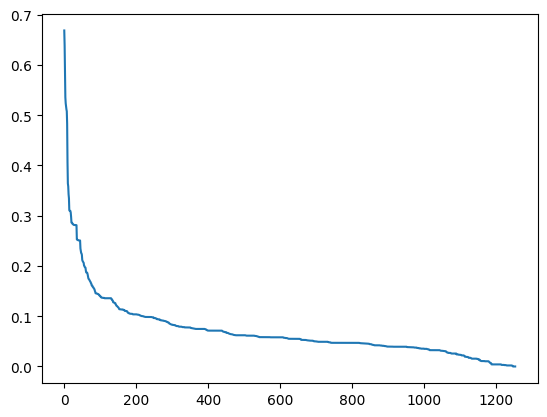

In [354]:
fig, ax = plt.subplots(1,1)
ax.plot(JS_dist_pd['jensen_shannon_dist'].values)

plt.show()

##### (!) существенные отличия в распределениях имеет не так много признаков

In [355]:
JS_dist_pd[JS_dist_pd['jensen_shannon_dist']>0.2]

,jensen_shannon_dist
Терапия1_ИМТ_ЗначениеПредставление,0.668456
Профессия,0.639031
Офтальмология1_Диагноз_ЗначениеПредставление,0.591787
Офтальмология1_ODДополнение_ЗначениеПредставление,0.535683
Офтальмология1_МКБ101,0.523506
Офтальмология1_ХР_Рекомендация1Представление,0.517350
Офтальмология1_OSДополнение_ЗначениеПредставление,0.511572
ДиспансернаяГруппаПредставление,0.507783
Офтальмология1_АнамнезДополнение_ЗначениеПредставление,0.483008
Цех,0.406711


## Модели

## 20.04.23 Модели по короткому набору признаков (только МКБ, вредные факторы и возраст)

In [ ]:
q = sorted(data.columns[data.columns.str.contains('МКБ')].tolist())
q

['Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'ЛабораторныеИсследования1_МКБ101',
 'ЛабораторныеИсследования1_МКБ102',
 'ЛабораторныеИсследования2_МКБ101',
 'ЛабораторныеИсследования2_МКБ102',
 'Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Неврология2_МКБ101',
 'Неврология2_МКБ102',
 'Оториноларингология1_МКБ101',
 'Оториноларингология1_МКБ102',
 'Оториноларингология1_МКБ103',
 'Оториноларингология1_МКБ104',
 'Оториноларингология2_МКБ101',
 'Оториноларингология2_МКБ102',
 'Оториноларингология2_МКБ103',
 'Оториноларингология2_МКБ104',
 'Оториноларингология3_МКБ101',
 'Офтальмология1_МКБ101',
 'Офтальмология1_МКБ102',
 'Офтальмология1_МКБ103',
 'Офтальмология1_МКБ104',
 'Офтальмология2_МКБ101',
 'Офтальмология2_МКБ102',


In [ ]:
data_short = data[['КлиентДатаРождения', 'Профессия', 'ВредныеФакторы']+q]
data_short

,КлиентДатаРождения,Профессия,ВредныеФакторы,Гинекология1_МКБ101,Гинекология1_МКБ102,Гинекология2_МКБ101,Гинекология2_МКБ102,Гинекология3_МКБ101,Гинекология3_МКБ102,Гинекология4_МКБ101,...,ХирургНеИсп1_МКБ102,ХирургНеИсп2_МКБ101,ХирургНеИсп2_МКБ102,Хирургия1_МКБ101,Хирургия1_МКБ102,Хирургия2_МКБ101,Хирургия2_МКБ102,Хирургия3_МКБ101,ЭКГНеИсп1_МКБ101,Эндоскопия1_МКБ101
0,1976-10-24,Ведущий специалист по организации обуения,11.4,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1987-11-18,Ведущий специалист,4.2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1985-09-08,Главный менеджер,4.2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-04-25,Главный специалист,11.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984-04-17,Старший специалист,11.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1993-12-29,Инженер,"4.4,4.5,6.1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN
1962,1989-07-10,Начальник лаборатории,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,1987-02-04,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN
1973,1993-02-04,Приемщик вагонов в депо,"4.2.5,6.1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sorted(data_short['Профессия'].unique().tolist())

['Авиамеханик',
 'Авиамеханик ',
 'Авиамеханик Авиамеханик',
 'Авиатехник  ПиД',
 'Авиатехник АиРЭО',
 'Авиатехник ПиД',
 'Агент-комплектовщик',
 'Агроном 1 категории',
 'Администратор',
 'Администратор-кассир',
 'Анестезиолог',
 'Ассистент врача-стоматолога',
 'Бармен',
 'Барменеджер',
 'Бригадир',
 'Бригадир-электромонтажник по обслуживанию и ремонту электрооборудования',
 'Бригадир-электромонтер по обслуживанию и ремонту электрооборудования',
 'Бурильщик',
 'Бурильщик капитального ремонта скважин',
 'Бухгалтер',
 'Бухгалтер 1 категории',
 'Ведущий агроном',
 'Ведущий агроном по защите растений',
 'Ведущий агроном по семеноводству',
 'Ведущий бухгалтер',
 'Ведущий геодезист',
 'Ведущий геофизик',
 'Ведущий инженер',
 'Ведущий инженер ',
 'Ведущий инженер (топ оборудование)',
 'Ведущий инженер - проектировщик',
 'Ведущий инженер АиРЭО',
 'Ведущий инженер ПиД',
 'Ведущий инженер по бурению ',
 'Ведущий инженер по радиационной безопасности (класс вредности 3.1)',
 'Ведущий инженер по св

In [ ]:
professions_count = data_short['Профессия'].value_counts()
print(len(professions_count))
professions_count

557


Ведущий агроном                           44
Инженер                                   37
Старший специалист                        34
Ведущий специалист                        32
Водитель автомобиля                       26
                                          ..
Слесарь-сборщик/водитель (смежная)         1
Слесарь КИПиА                              1
Мастер по капитальному ремонту скважин     1
Слесарь/водитель (смежная)                 1
Анестезиолог                               1
Name: Профессия, Length: 557, dtype: int64

In [ ]:
professions_count[professions_count==1]

Наладчик станков и манипуляторов с программным управлением 5 разряд    1
Специалист по персоналу                                                1
Начальник отдела (3 класс)                                             1
Менеджер склада                                                        1
Менеджер по безопасности                                               1
                                                                      ..
Слесарь-сборщик/водитель (смежная)                                     1
Слесарь КИПиА                                                          1
Мастер по капитальному ремонту скважин                                 1
Слесарь/водитель (смежная)                                             1
Анестезиолог                                                           1
Name: Профессия, Length: 322, dtype: int64

#### 557 профессий, из которых 322 встречаются 1 раз. можно было бы как-то разбить профессии на группы, экспертно, или через похожесть их TfIdf-представлений, но пока предполагаю, что вся информация, потенциально содержащаяся в "профессиях", содержится и во "вредных факторах".

##### one-hot encoding кодов МКБ

In [ ]:
X_MKB_onehot = pd.concat([pd.get_dummies(data[elem], dummy_na=True, prefix=elem) for elem in q],axis=1)
X_MKB_onehot

,Гинекология1_МКБ101_D25,Гинекология1_МКБ101_D25.9,Гинекология1_МКБ101_N60.2,Гинекология1_МКБ101_N80.0,Гинекология1_МКБ101_N83.2,Гинекология1_МКБ101_Z00.0,Гинекология1_МКБ101_nan,Гинекология1_МКБ102_D25.9,Гинекология1_МКБ102_H52.1,Гинекология1_МКБ102_Z00.0,...,Хирургия2_МКБ101_nan,Хирургия2_МКБ102_K40.9,Хирургия2_МКБ102_Z00.0,Хирургия2_МКБ102_nan,Хирургия3_МКБ101_nan,ЭКГНеИсп1_МКБ101_Z00.0,ЭКГНеИсп1_МКБ101_nan,Эндоскопия1_МКБ101_K26.7,Эндоскопия1_МКБ101_Z00.0,Эндоскопия1_МКБ101_nan
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1962,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1972,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1973,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1


In [ ]:
X_MKB_onehot.sum().sort_values()

Неврология1_МКБ101_I11.9                1
Оториноларингология1_МКБ101_H52.1       1
Терапия1_МКБ102_M42.1                   1
Терапия1_МКБ101_K29.5                   1
Неврология2_МКБ101_I66.9                1
                                     ... 
ХирургНеИсп2_МКБ101_nan              1569
Оториноларингология3_МКБ101_nan      1570
ТерапевтНеИсп1_МКБ102_nan            1570
ЭКГНеИсп1_МКБ101_nan                 1570
Хирургия3_МКБ101_nan                 1571
Length: 363, dtype: int64

##### обработка столбца "возраст"

In [ ]:
X_age = (data['ДатаЗавершенияМедосмотра']-data['КлиентДатаРождения']).apply(lambda x: np.round(x.total_seconds()/60/60/24/365.25,2))
#X_age.apply(lambda x: x.total_seconds()/60/60/24/365.25)
X_age

0       45.25
1       34.21
2       36.44
3       33.81
4       37.85
        ...  
1961    28.92
1962    33.39
1972    35.82
1973    29.82
1981    51.22
Length: 1571, dtype: float64

In [ ]:
# quantile-based bins
qnum=10
qbins = pd.qcut(X_age,qnum)
qbins = pd.Series(qbins)
qbins

0       (43.61, 48.02]
1       (34.17, 36.99]
2       (34.17, 36.99]
3       (30.43, 34.17]
4       (36.99, 40.27]
             ...      
1961    (26.07, 30.43]
1962    (30.43, 34.17]
1972    (34.17, 36.99]
1973    (26.07, 30.43]
1981    (48.02, 53.27]
Length: 1571, dtype: category
Categories (10, interval[float64, right]): [(16.259, 26.07] < (26.07, 30.43] < (30.43, 34.17] <
                                            (34.17, 36.99] ... (43.61, 48.02] < (48.02, 53.27] <
                                            (53.27, 58.12] < (58.12, 71.89]]

In [ ]:
X_age_extended = pd.concat([X_age,  qbins], axis=1)
X_age_extended.columns = ['age', 'age_quantiles']
X_age_extended.sort_values('age_quantiles')

,age,age_quantiles
1505,23.71,"(16.259, 26.07]"
370,25.24,"(16.259, 26.07]"
1678,25.33,"(16.259, 26.07]"
384,23.34,"(16.259, 26.07]"
403,24.88,"(16.259, 26.07]"
...,...,...
824,62.84,"(58.12, 71.89]"
443,66.49,"(58.12, 71.89]"
1820,60.85,"(58.12, 71.89]"
1600,60.94,"(58.12, 71.89]"


In [ ]:
X_age_dummies = pd.get_dummies(X_age_extended['age_quantiles'])
X_age_dummies

,"(16.259, 26.07]","(26.07, 30.43]","(30.43, 34.17]","(34.17, 36.99]","(36.99, 40.27]","(40.27, 43.61]","(43.61, 48.02]","(48.02, 53.27]","(53.27, 58.12]","(58.12, 71.89]"
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1961,0,1,0,0,0,0,0,0,0,0
1962,0,0,1,0,0,0,0,0,0,0
1972,0,0,0,1,0,0,0,0,0,0
1973,0,1,0,0,0,0,0,0,0,0


In [ ]:
X = pd.concat([X_age_dummies, X_adverse_factors.loc[data.index], X_MKB_onehot], axis=1 )
X

,"(16.259, 26.07]","(26.07, 30.43]","(30.43, 34.17]","(34.17, 36.99]","(36.99, 40.27]","(40.27, 43.61]","(43.61, 48.02]","(48.02, 53.27]","(53.27, 58.12]","(58.12, 71.89]",...,Хирургия2_МКБ101_nan,Хирургия2_МКБ102_K40.9,Хирургия2_МКБ102_Z00.0,Хирургия2_МКБ102_nan,Хирургия3_МКБ101_nan,ЭКГНеИсп1_МКБ101_Z00.0,ЭКГНеИсп1_МКБ101_nan,Эндоскопия1_МКБ101_K26.7,Эндоскопия1_МКБ101_Z00.0,Эндоскопия1_МКБ101_nan
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1962,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1972,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1973,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1


In [ ]:
X.isna().sum().sum()

0

In [ ]:
target

,yes,maybe,no
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
1961,1,0,0
1962,1,0,0
1972,1,0,0
1973,1,0,0


In [ ]:
target[(target['maybe']==1)|(target['no']==1)]

,yes,maybe,no
2,0,1,0
4,0,1,0
6,0,1,0
10,0,1,0
19,0,1,0
...,...,...,...
1906,0,1,0
1921,0,1,0
1945,0,1,0
1947,0,1,0


#### LGBM with binary target

In [ ]:
target_binary = target['maybe'] + target['no']
target_binary

0       0
1       0
2       1
3       0
4       1
       ..
1961    0
1962    0
1972    0
1973    0
1981    0
Length: 1571, dtype: int64

In [ ]:
target_binary.value_counts()

0    1434
1     137
dtype: int64

In [ ]:
model = lgbm.LGBMClassifier(is_unbalance=True)
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)

res = cross_val_score(model, X.values, target_binary.values, cv=cv)

print(res.mean())
res


0.889242745930644


array([0.91111111, 0.89490446, 0.88853503, 0.88853503, 0.89171975,
       0.8984127 , 0.87579618, 0.87898089, 0.88853503, 0.88216561,
       0.86031746, 0.86942675, 0.91401274, 0.90127389, 0.87898089,
       0.8984127 , 0.88216561, 0.88535032, 0.89808917, 0.92675159,
       0.87619048, 0.87898089, 0.87261146, 0.89808917, 0.89171975])

In [ ]:
model = lgbm.LGBMClassifier(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)

res = cross_val_score(model, X.values, target_binary.values, cv=cv)

print(res.mean())
res

0.8855436255181479


array([0.90793651, 0.87898089, 0.88216561, 0.88853503, 0.87579618,
       0.90793651, 0.8566879 , 0.86942675, 0.90764331, 0.89171975,
       0.87301587, 0.84713376, 0.91401274, 0.90764331, 0.86624204,
       0.90793651, 0.87579618, 0.86624204, 0.88535032, 0.90127389,
       0.88571429, 0.88216561, 0.88535032, 0.88853503, 0.88535032])

In [ ]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
base_model = lgbm.LGBMClassifier()

param_gridsearch_0 = {
    'max_depth': [5,7,9],
    'scale_pos_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model.fit(X.values, target_binary.values)

print(model.best_score_)
print(model.best_params_)

In [ ]:
base_model = lgbm.LGBMClassifier()

param_gridsearch_0 = {
    'max_depth': [6,7,8],
    'scale_pos_weight': [1, 2],
    'subsample': [0.6, 0.7, 0.75],
    'colsample_bytree': [0.6, 0.7, 0.75],
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.025, 0.05, 0.075]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model.fit(X.values, target_binary.values)

print(model.best_score_)
print(model.best_params_)

In [ ]:
base_model = lgbm.LGBMClassifier(scale_pos_weight=1, n_estimators=50, colsample_bytree=0.75, max_depth=8)

param_gridsearch_0 = {
    'subsample': [0.55, 0.6, 0.65],
    'learning_rate': [0.02, 0.025, 0.03]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model.fit(X.values, target_binary.values)

print(model.best_score_)
print(model.best_params_)

#####  (!) пока лучшая точность (accuracy по cross-val-score) классической ML модели (lgbm) по короткому набору признаков = 0,9146

#### neural network (binary target)

In [ ]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(25, input_dim=X.shape[1], activation='relu'))
	#model.add(Dropout(0.25))
	#model.add(BatchNormalization())
	#model.add(Dense(25, activation='relu'))
	#model.add(Dropout(0.25))
	#model.add(BatchNormalization())
	model.add(Dense(10, activation='relu'))
	#model.add(Dropout(0.25))
	#model.add(BatchNormalization())	
	model.add(Dense(1, activation='sigmoid'))
 
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
estimator = KerasClassifier(model=baseline_model, epochs=200, batch_size=10, verbose=0)
res = cross_val_score(estimator, X.values, target_binary.values, cv=cv)

print(res.mean())
res

In [ ]:
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(50, input_dim=X.shape[1], activation='relu'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  model.add(Dense(25, activation='relu'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  #model.add(Dense(25, activation='relu'))
  #model.add(Dropout(0.25))
  #model.add(BatchNormalization())
  model.add(Dense(10, activation='relu'))
  #model.add(Dropout(0.25))
  #model.add(BatchNormalization())	
  model.add(Dense(1, activation='sigmoid'))
 
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
estimator = KerasClassifier(model=baseline_model, epochs=500, batch_size=10, verbose=0)
res = cross_val_score(estimator, X.values, target_binary.values, cv=cv)

print(res.mean())
res

##### (!) пока лучшая точность (accuracy по cross-val-score) DL модели по короткому набору признаков = 0,9026, но это явно не предел

## 03.05.23 Модели по набору факторов, имеющих потенциально хорошую объясняющую силу (по разнице распределения фактора на классах "годен" /"ограниченно годен")

#### оcтавлю все МКБ, "вредные факторы", возраст и потенциально важные факторы

In [356]:

cutoff = 0.2
q = JS_dist_pd[JS_dist_pd['jensen_shannon_dist']>cutoff].index.tolist()
print(len(q))

q = sorted(list(set(q + data.columns[data.columns.str.contains('МКБ')].tolist())))
print(len(q))
q

56
145


['Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление',
 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'ДатаЗавершенияМедосмотра',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'ДиспансернаяГруппаПредставление',
 'ЛабораторныеИсследования1_МКБ101',
 'ЛабораторныеИсследования1_МКБ102',
 'ЛабораторныеИсследования2_МКБ101',
 'ЛабораторныеИсследования2_МКБ102',
 'Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Неврология2_МКБ101',
 'Неврология2_МКБ102',
 'Оториноларингология1_МКБ101',
 'Оториноларингология1_МКБ102',
 'Оториноларингология1_МКБ103',
 'Оториноларингология1_МКБ104',
 'Оториноларингология2_МКБ101',
 'Оториноларингология2_МКБ102',
 'Оториноларингология2_МКБ103',
 'Оториноларингология2_МКБ104',
 'Отори

In [357]:
q.remove('ДатаЗавершенияМедосмотра')
q.remove('Профессия')
q.remove('Цех')


In [358]:
print(len(q))

142


In [359]:
q

['Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление',
 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'ДиспансернаяГруппаПредставление',
 'ЛабораторныеИсследования1_МКБ101',
 'ЛабораторныеИсследования1_МКБ102',
 'ЛабораторныеИсследования2_МКБ101',
 'ЛабораторныеИсследования2_МКБ102',
 'Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Неврология2_МКБ101',
 'Неврология2_МКБ102',
 'Оториноларингология1_МКБ101',
 'Оториноларингология1_МКБ102',
 'Оториноларингология1_МКБ103',
 'Оториноларингология1_МКБ104',
 'Оториноларингология2_МКБ101',
 'Оториноларингология2_МКБ102',
 'Оториноларингология2_МКБ103',
 'Оториноларингология2_МКБ104',
 'Оториноларингология3_МКБ101',
 'Оф

##### разбиение признаков на количественные и качественные

In [360]:
aux = data[q].dtypes
columns_float = aux[aux!='object'].index.tolist()
columns_float

['Терапия1_АртериальноеДавление21_ЗначениеПредставление',
 'Терапия1_Вес_ЗначениеПредставление',
 'Терапия1_ИМТ_ЗначениеПредставление',
 'Терапия1_П_ЗначениеПредставление',
 'Терапия1_Рост_ЗначениеПредставление',
 'Терапия2_Вес_ЗначениеПредставление',
 'Терапия2_ИМТ_ЗначениеПредставление',
 'Терапия2_Рост_ЗначениеПредставление']

In [361]:
aux = data[q].dtypes
columns_str = aux[aux=='object'].index.tolist()
columns_str

['Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление',
 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'ДиспансернаяГруппаПредставление',
 'ЛабораторныеИсследования1_МКБ101',
 'ЛабораторныеИсследования1_МКБ102',
 'ЛабораторныеИсследования2_МКБ101',
 'ЛабораторныеИсследования2_МКБ102',
 'Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Неврология2_МКБ101',
 'Неврология2_МКБ102',
 'Оториноларингология1_МКБ101',
 'Оториноларингология1_МКБ102',
 'Оториноларингология1_МКБ103',
 'Оториноларингология1_МКБ104',
 'Оториноларингология2_МКБ101',
 'Оториноларингология2_МКБ102',
 'Оториноларингология2_МКБ103',
 'Оториноларингология2_МКБ104',
 'Оториноларингология3_МКБ101',
 'Оф

In [362]:
columns_MKB = [elem for elem in columns_str if elem.find('МКБ')!=-1]
columns_MKB

['Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'ЛабораторныеИсследования1_МКБ101',
 'ЛабораторныеИсследования1_МКБ102',
 'ЛабораторныеИсследования2_МКБ101',
 'ЛабораторныеИсследования2_МКБ102',
 'Неврология1_МКБ101',
 'Неврология1_МКБ102',
 'Неврология2_МКБ101',
 'Неврология2_МКБ102',
 'Оториноларингология1_МКБ101',
 'Оториноларингология1_МКБ102',
 'Оториноларингология1_МКБ103',
 'Оториноларингология1_МКБ104',
 'Оториноларингология2_МКБ101',
 'Оториноларингология2_МКБ102',
 'Оториноларингология2_МКБ103',
 'Оториноларингология2_МКБ104',
 'Оториноларингология3_МКБ101',
 'Офтальмология1_МКБ101',
 'Офтальмология1_МКБ102',
 'Офтальмология1_МКБ103',
 'Офтальмология1_МКБ104',
 'Офтальмология2_МКБ101',
 'Офтальмология2_МКБ102',


##### one-hot encoding кодов МКБ

In [363]:
X_MKB_onehot = pd.concat([pd.get_dummies(data[elem], dummy_na=True, prefix=elem) for elem in columns_MKB],axis=1)
X_MKB_onehot

,Гинекология1_МКБ101_D25,Гинекология1_МКБ101_D25.9,Гинекология1_МКБ101_N60.2,Гинекология1_МКБ101_N80.0,Гинекология1_МКБ101_N83.2,Гинекология1_МКБ101_Z00.0,Гинекология1_МКБ101_nan,Гинекология1_МКБ102_D25.9,Гинекология1_МКБ102_H52.1,Гинекология1_МКБ102_Z00.0,...,Хирургия2_МКБ101_nan,Хирургия2_МКБ102_K40.9,Хирургия2_МКБ102_Z00.0,Хирургия2_МКБ102_nan,Хирургия3_МКБ101_nan,ЭКГНеИсп1_МКБ101_Z00.0,ЭКГНеИсп1_МКБ101_nan,Эндоскопия1_МКБ101_K26.7,Эндоскопия1_МКБ101_Z00.0,Эндоскопия1_МКБ101_nan
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1962,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1972,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1
1973,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,1


##### очистка и/или отбрасывание новых (предположительно) качественных столбцов

In [364]:
columns_no_MKB = [elem for elem in columns_str if elem.find('МКБ')==-1]
print(len(columns_no_MKB))
columns_no_MKB

42


['Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление',
 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление',
 'ДиспансернаяГруппаПредставление',
 'Офтальмология1_OD_ЗначениеПредставление',
 'Офтальмология1_ODДополнение_ЗначениеПредставление',
 'Офтальмология1_OS_ЗначениеПредставление',
 'Офтальмология1_OSДополнение_ЗначениеПредставление',
 'Офтальмология1_Анамнез_ЗначениеПредставление',
 'Офтальмология1_АнамнезДополнение_ЗначениеПредставление',
 'Офтальмология1_ГлазноеДно_ЗначениеПредставление',
 'Офтальмология1_ГоденНегоден_ЗначениеПредставление',
 'Офтальмология1_ГраницыЧеткие_ЗначениеПредставление',
 'Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление',
 'Офтальмология1_Диагноз_ЗначениеПредставление',
 'Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление',
 'Офтальмология1_Жалобы_ЗначениеПредставление',
 'Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление',
 'Офтальмология1_Конъюнктива1_ЗначениеПредставление',
 'Офтальмология1_ПередняяКамер

###### 'Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление'

In [365]:
X_no_MKB = pd.DataFrame()

In [366]:
data['Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление'].value_counts(dropna=False)

NaN           1341
04.11.2022       9
01.11.2022       7
20.10.2022       7
13.11.2022       6
              ... 
081022           1
09 10 22         1
18 10 22         1
05 10 22         1
16/11/2022       1
Name: Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление, Length: 128, dtype: int64

удалить

In [367]:
columns_no_MKB.remove('Гинекология1_ДатаПоследнейMensis_ЗначениеПредставление')

###### 'Гинекология1_ДиагнозДополнение_ЗначениеПредставление'

In [368]:
data['Гинекология1_ДиагнозДополнение_ЗначениеПредставление'].value_counts(dropna=False)

NaN                                                    1485
1. узи омт 2. обследование и лечение гинеколога          10
1. УЗИ ОМТ 2. ОБСЛЕДОВАНИЕ И ЛЕЧЕНИЕ ГИНЕКОЛОГА           7
ст.чистоты №4_x000D_\nцитология №4                        4
ст.чистоты №1_x000D_\nцитология №1                        3
                                                       ... 
предметное стекло №4                                      1
предметное стекло №7                                      1
предметное стекло №16                                     1
предметное стекло № 3_x000D_\nРекомендации:УЗИ ОМТ.       1
ампутация матки без придатков в 2009г                     1
Name: Гинекология1_ДиагнозДополнение_ЗначениеПредставление, Length: 63, dtype: int64

???????

In [369]:
aux = pd.DataFrame(np.where(data['Гинекология1_ДиагнозДополнение_ЗначениеПредставление'].isna(),1,0), columns = ['Гинекология1_ДиагнозДополнение_ЗначениеПредставление'+'_na'], index=data.index)
aux['Гинекология1_ДиагнозДополнение_ЗначениеПредставление'+'_other'] = np.where(data['Гинекология1_ДиагнозДополнение_ЗначениеПредставление'].isna(),0,1)
aux

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1961,1,0
1962,1,0
1972,1,0
1973,1,0


In [370]:
X_no_MKB = pd.concat([X_no_MKB, aux])
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1961,1,0
1962,1,0
1972,1,0
1973,1,0


###### 'ДиспансернаяГруппаПредставление'

In [371]:
data['ДиспансернаяГруппаПредставление'].value_counts(dropna=False)

I       779
II      389
IIIа    369
IIIб     25
NaN       9
Name: ДиспансернаяГруппаПредставление, dtype: int64

оставить

In [372]:
aux = pd.get_dummies(data['ДиспансернаяГруппаПредставление'], prefix='ДиспансернаяГруппаПредставление', dummy_na=True)
aux

,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan
0,1,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
1961,1,0,0,0,0
1962,1,0,0,0,0
1972,1,0,0,0,0
1973,1,0,0,0,0


In [373]:
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan
0,1,0,1,0,0,0,0
1,1,0,0,0,1,0,0
2,1,0,0,1,0,0,0
3,1,0,1,0,0,0,0
4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0
1962,1,0,1,0,0,0,0
1972,1,0,1,0,0,0,0
1973,1,0,1,0,0,0,0


###### 'Офтальмология1_OD_ЗначениеПредставление'

In [374]:
data['Офтальмология1_OD_ЗначениеПредставление'].value_counts(dropna=False)

прозрачный    982
NaN           561
помутнение     16
1,0             5
в/о             3
N               1
0,9             1
20              1
-1,50           1
Name: Офтальмология1_OD_ЗначениеПредставление, dtype: int64

???????


In [375]:
aux = pd.DataFrame(np.where(data['Офтальмология1_OD_ЗначениеПредставление'].isna(),1,0), columns = ['Офтальмология1_OD_ЗначениеПредставление'+'_na'], index=data.index)
aux['Офтальмология1_OD_ЗначениеПредставление'+'_прозрачный'] = np.where(data['Офтальмология1_OD_ЗначениеПредставление']=='прозрачный',1,0)
aux['Офтальмология1_OD_ЗначениеПредставление'+'_other'] = np.where((data['Офтальмология1_OD_ЗначениеПредставление']!='прозрачный')&(data['Офтальмология1_OD_ЗначениеПредставление'].notna()),1,0)
aux

,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1961,0,1,0
1962,1,0,0
1972,0,1,0
1973,0,1,0


In [376]:
aux.sum()

Офтальмология1_OD_ЗначениеПредставление_na            561
Офтальмология1_OD_ЗначениеПредставление_прозрачный    982
Офтальмология1_OD_ЗначениеПредставление_other          28
dtype: int64

In [377]:
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other
0,1,0,1,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0
1962,1,0,1,0,0,0,0,1,0,0
1972,1,0,1,0,0,0,0,0,1,0
1973,1,0,1,0,0,0,0,0,1,0


###### 'Офтальмология1_ODДополнение_ЗначениеПредставление'

In [378]:
data['Офтальмология1_ODДополнение_ЗначениеПредставление'].value_counts(dropna=False)

NaN      1256
1.0       110
1,0       101
0,9        23
0,8        14
0.9        14
0,7        11
0,5        10
0,6         8
0.8         4
0.7         3
0,4         3
0.5         3
0.6         2
0.3         2
0,3         2
0,2         1
0.4         1
0.1         1
0,3нк       1
в/о         1
Name: Офтальмология1_ODДополнение_ЗначениеПредставление, dtype: int64

In [379]:
data['Офтальмология1_ODДополнение_ЗначениеПредставление'] = data['Офтальмология1_ODДополнение_ЗначениеПредставление'].str.replace(',', '.')
data['Офтальмология1_ODДополнение_ЗначениеПредставление'].value_counts(dropna=False)

NaN      1256
1.0       211
0.9        37
0.8        18
0.7        14
0.5        13
0.6        10
0.4         4
0.3         4
в/о         1
0.2         1
0.1         1
0.3нк       1
Name: Офтальмология1_ODДополнение_ЗначениеПредставление, dtype: int64

In [380]:
feature = 'Офтальмология1_ODДополнение_ЗначениеПредставление'
aux = pd.DataFrame(np.where(data[feature].isna(),1,0), columns = [feature+'_na'], index=data.index)
aux[feature+'_1'] = np.where(data[feature]=='1.0',1,0)
aux[feature+'_0.9'] = np.where(data[feature]=='0.9',1,0)
aux[feature+'_0.8'] = np.where(data[feature]=='0.8',1,0)
aux[feature+'_0.7'] = np.where(data[feature]=='0.7',1,0)
aux[feature+'_0.5'] = np.where(data[feature]=='0.5',1,0)
aux[feature+'_0.6'] = np.where(data[feature]=='0.6',1,0)
aux[feature+'_other'] = 1-aux.sum(axis=1)
aux

,Офтальмология1_ODДополнение_ЗначениеПредставление_na,Офтальмология1_ODДополнение_ЗначениеПредставление_1,Офтальмология1_ODДополнение_ЗначениеПредставление_0.9,Офтальмология1_ODДополнение_ЗначениеПредставление_0.8,Офтальмология1_ODДополнение_ЗначениеПредставление_0.7,Офтальмология1_ODДополнение_ЗначениеПредставление_0.5,Офтальмология1_ODДополнение_ЗначениеПредставление_0.6,Офтальмология1_ODДополнение_ЗначениеПредставление_other
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1961,1,0,0,0,0,0,0,0
1962,1,0,0,0,0,0,0,0
1972,1,0,0,0,0,0,0,0
1973,1,0,0,0,0,0,0,0


In [381]:
aux.sum()

Офтальмология1_ODДополнение_ЗначениеПредставление_na       1256
Офтальмология1_ODДополнение_ЗначениеПредставление_1         211
Офтальмология1_ODДополнение_ЗначениеПредставление_0.9        37
Офтальмология1_ODДополнение_ЗначениеПредставление_0.8        18
Офтальмология1_ODДополнение_ЗначениеПредставление_0.7        14
Офтальмология1_ODДополнение_ЗначениеПредставление_0.5        13
Офтальмология1_ODДополнение_ЗначениеПредставление_0.6        10
Офтальмология1_ODДополнение_ЗначениеПредставление_other      12
dtype: int64

In [382]:
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,Офтальмология1_ODДополнение_ЗначениеПредставление_na,Офтальмология1_ODДополнение_ЗначениеПредставление_1,Офтальмология1_ODДополнение_ЗначениеПредставление_0.9,Офтальмология1_ODДополнение_ЗначениеПредставление_0.8,Офтальмология1_ODДополнение_ЗначениеПредставление_0.7,Офтальмология1_ODДополнение_ЗначениеПредставление_0.5,Офтальмология1_ODДополнение_ЗначениеПредставление_0.6,Офтальмология1_ODДополнение_ЗначениеПредставление_other
0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1962,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1972,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1973,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


###### Офтальмология1_OS_ЗначениеПредставление

In [383]:
feature = 'Офтальмология1_OS_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

прозрачный    982
NaN           561
помутнение     15
1,0             4
в/о             3
N               1
+1,50           1
0,9             1
21              1
-1,50           1
афакия          1
Name: Офтальмология1_OS_ЗначениеПредставление, dtype: int64

повторяет 'Офтальмология1_OD_ЗначениеПредставление'.
удалить

In [384]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_OSДополнение_ЗначениеПредставление'



In [385]:
feature = 'Офтальмология1_OSДополнение_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN        1264
1.0         111
1,0          97
0,7          24
0,9          17
0,8          14
0.7           7
0,6           6
0.9           6
0.8           6
0,3           3
0,2           2
0,5           2
0.5           2
0,1-0,2       2
0,2 нк        1
0,4           1
0,            1
0.6           1
0,8нк         1
0,3нк         1
0.4           1
0.3           1
Name: Офтальмология1_OSДополнение_ЗначениеПредставление, dtype: int64

почти повторяет 'Офтальмология1_OS_ЗначениеПредставление'.
удалить

In [386]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_Анамнез_ЗначениеПредставление'

In [387]:
feature = 'Офтальмология1_Анамнез_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

не отягощен    1007
NaN             561
отягощен          3
Name: Офтальмология1_Анамнез_ЗначениеПредставление, dtype: int64

In [388]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)

In [389]:
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ODДополнение_ЗначениеПредставление_1,Офтальмология1_ODДополнение_ЗначениеПредставление_0.9,Офтальмология1_ODДополнение_ЗначениеПредставление_0.8,Офтальмология1_ODДополнение_ЗначениеПредставление_0.7,Офтальмология1_ODДополнение_ЗначениеПредставление_0.5,Офтальмология1_ODДополнение_ЗначениеПредставление_0.6,Офтальмология1_ODДополнение_ЗначениеПредставление_other,Офтальмология1_Анамнез_ЗначениеПредставление_не отягощен,Офтальмология1_Анамнез_ЗначениеПредставление_отягощен,Офтальмология1_Анамнез_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


###### 'Офтальмология1_АнамнезДополнение_ЗначениеПредставление'

In [390]:
feature = 'Офтальмология1_АнамнезДополнение_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN                                                          1414
носит очки -1.50                                                7
носит очки -1.0                                                 5
носит очки -2.50                                                4
очки для чтения +1.5                                            4
                                                             ... 
носит очки -1.50/-1.50                                          1
носит очки -4.50                                                1
носит мкл -2.75 с астигматизмом, склеропластика в детстве       1
ласик в начале окт 2022, было -1.0                              1
2019г Лазик (-3.0)                                              1
Name: Офтальмология1_АнамнезДополнение_ЗначениеПредставление, Length: 115, dtype: int64

удалить

In [391]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_ГлазноеДно_ЗначениеПредставление'

In [392]:
feature = 'Офтальмология1_ГлазноеДно_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

не подлежит обследованию    771
NaN                         573
осмотрено                   227
Name: Офтальмология1_ГлазноеДно_ЗначениеПредставление, dtype: int64

In [393]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ODДополнение_ЗначениеПредставление_0.7,Офтальмология1_ODДополнение_ЗначениеПредставление_0.5,Офтальмология1_ODДополнение_ЗначениеПредставление_0.6,Офтальмология1_ODДополнение_ЗначениеПредставление_other,Офтальмология1_Анамнез_ЗначениеПредставление_не отягощен,Офтальмология1_Анамнез_ЗначениеПредставление_отягощен,Офтальмология1_Анамнез_ЗначениеПредставление_nan,Офтальмология1_ГлазноеДно_ЗначениеПредставление_не подлежит обследованию,Офтальмология1_ГлазноеДно_ЗначениеПредставление_осмотрено,Офтальмология1_ГлазноеДно_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


###### 'Офтальмология1_ГоденНегоден_ЗначениеПредставление'

In [394]:
feature = 'Офтальмология1_ГоденНегоден_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

Годен    1010
NaN       561
Name: Офтальмология1_ГоденНегоден_ЗначениеПредставление, dtype: int64

In [395]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ODДополнение_ЗначениеПредставление_0.6,Офтальмология1_ODДополнение_ЗначениеПредставление_other,Офтальмология1_Анамнез_ЗначениеПредставление_не отягощен,Офтальмология1_Анамнез_ЗначениеПредставление_отягощен,Офтальмология1_Анамнез_ЗначениеПредставление_nan,Офтальмология1_ГлазноеДно_ЗначениеПредставление_не подлежит обследованию,Офтальмология1_ГлазноеДно_ЗначениеПредставление_осмотрено,Офтальмология1_ГлазноеДно_ЗначениеПредставление_nan,Офтальмология1_ГоденНегоден_ЗначениеПредставление_Годен,Офтальмология1_ГоденНегоден_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


###### 'Офтальмология1_ГраницыЧеткие_ЗначениеПредставление'

In [396]:
feature = 'Офтальмология1_ГраницыЧеткие_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

Нет    957
NaN    561
Да      53
Name: Офтальмология1_ГраницыЧеткие_ЗначениеПредставление, dtype: int64

In [397]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_Анамнез_ЗначениеПредставление_отягощен,Офтальмология1_Анамнез_ЗначениеПредставление_nan,Офтальмология1_ГлазноеДно_ЗначениеПредставление_не подлежит обследованию,Офтальмология1_ГлазноеДно_ЗначениеПредставление_осмотрено,Офтальмология1_ГлазноеДно_ЗначениеПредставление_nan,Офтальмология1_ГоденНегоден_ЗначениеПредставление_Годен,Офтальмология1_ГоденНегоден_ЗначениеПредставление_nan,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_Да,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_Нет,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


###### 'Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление'

In [398]:
feature = 'Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

без патологии      1007
NaN                 561
с особенностями       3
Name: Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление, dtype: int64

In [399]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ГлазноеДно_ЗначениеПредставление_осмотрено,Офтальмология1_ГлазноеДно_ЗначениеПредставление_nan,Офтальмология1_ГоденНегоден_ЗначениеПредставление_Годен,Офтальмология1_ГоденНегоден_ЗначениеПредставление_nan,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_Да,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_Нет,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_nan,Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление_без патологии,Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление_с особенностями,Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,1,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,1,0,0
4,1,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


###### 'Офтальмология1_Диагноз_ЗначениеПредставление'

In [400]:
feature = 'Офтальмология1_Диагноз_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                 568
[Z00.0] Общий медицинский осмотр_x000D_\n                                                                                                                                                                                           563
[H52.1] Миопия_x000D_\n                                                                                                                                                                                                             108
[H52.0] Гиперметропия_x000D_\n                                                                                                                                                                                                       45
[H52.1] Миопия_x000D_\nОписание: Миопия сл ст ОИ_x000D_\n               

In [401]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление'

In [402]:
feature = 'Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

Нет    957
NaN    561
Да      53
Name: Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление, dtype: int64

In [403]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ГоденНегоден_ЗначениеПредставление_nan,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_Да,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_Нет,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_nan,Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление_без патологии,Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление_с особенностями,Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление_nan,Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление_Да,Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление_Нет,Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1962,1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


###### 'Офтальмология1_Жалобы_ЗначениеПредставление'

In [404]:
feature = 'Офтальмология1_Жалобы_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

не предъявляет    1009
NaN                561
предъявляет          1
Name: Офтальмология1_Жалобы_ЗначениеПредставление, dtype: int64

In [405]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление'

In [406]:
feature = 'Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

без патологии      995
NaN                573
с особенностями      3
Name: Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление, dtype: int64

In [407]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ГраницыЧеткие_ЗначениеПредставление_nan,Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление_без патологии,Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление_с особенностями,Офтальмология1_ДвигательныйАппаратГлаз_ЗначениеПредставление_nan,Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление_Да,Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление_Нет,Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление_nan,Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление_без патологии,Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление_с особенностями,Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


###### 'Офтальмология1_Конъюнктива1_ЗначениеПредставление'

In [408]:
feature = 'Офтальмология1_Конъюнктива1_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

бледно – розовая    995
NaN                 573
птеригиум             2
гиперемирована        1
Name: Офтальмология1_Конъюнктива1_ЗначениеПредставление, dtype: int64

In [409]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление_Да,Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление_Нет,Офтальмология1_ДискиЗрительныхНервовБледноРозовые_ЗначениеПредставление_nan,Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление_без патологии,Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление_с особенностями,Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление_nan,Офтальмология1_Конъюнктива1_ЗначениеПредставление_бледно – розовая,Офтальмология1_Конъюнктива1_ЗначениеПредставление_гиперемирована,Офтальмология1_Конъюнктива1_ЗначениеПредставление_птеригиум,Офтальмология1_Конъюнктива1_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


###### 'Офтальмология1_ПередняяКамера_ЗначениеПредставление'

In [410]:
feature = 'Офтальмология1_ПередняяКамера_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

средней глубины    998
NaN                573
Name: Офтальмология1_ПередняяКамера_ЗначениеПредставление, dtype: int64

In [411]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_ПоляЗрения_ЗначениеПредставление'

In [412]:
feature = 'Офтальмология1_ПоляЗрения_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

без патологии               583
NaN                         573
не подлежит обследованию    413
с особенностями               2
Name: Офтальмология1_ПоляЗрения_ЗначениеПредставление, dtype: int64

In [413]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление_с особенностями,Офтальмология1_ЗащитныйАппаратГлаз_ЗначениеПредставление_nan,Офтальмология1_Конъюнктива1_ЗначениеПредставление_бледно – розовая,Офтальмология1_Конъюнктива1_ЗначениеПредставление_гиперемирована,Офтальмология1_Конъюнктива1_ЗначениеПредставление_птеригиум,Офтальмология1_Конъюнктива1_ЗначениеПредставление_nan,Офтальмология1_ПоляЗрения_ЗначениеПредставление_без патологии,Офтальмология1_ПоляЗрения_ЗначениеПредставление_не подлежит обследованию,Офтальмология1_ПоляЗрения_ЗначениеПредставление_с особенностями,Офтальмология1_ПоляЗрения_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


###### 'Офтальмология1_ПрофнепригодностьВременнаяПредставление1'

In [414]:
feature = 'Офтальмология1_ПрофнепригодностьВременнаяПредставление1'
data[feature].value_counts(dropna=False)

Годен              981
NaN                578
Годен, кроме п.     10
Не годен             2
Name: Офтальмология1_ПрофнепригодностьВременнаяПредставление1, dtype: int64

In [415]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_Конъюнктива1_ЗначениеПредставление_птеригиум,Офтальмология1_Конъюнктива1_ЗначениеПредставление_nan,Офтальмология1_ПоляЗрения_ЗначениеПредставление_без патологии,Офтальмология1_ПоляЗрения_ЗначениеПредставление_не подлежит обследованию,Офтальмология1_ПоляЗрения_ЗначениеПредставление_с особенностями,Офтальмология1_ПоляЗрения_ЗначениеПредставление_nan,Офтальмология1_ПрофнепригодностьВременнаяПредставление1_Годен,"Офтальмология1_ПрофнепригодностьВременнаяПредставление1_Годен, кроме п.",Офтальмология1_ПрофнепригодностьВременнаяПредставление1_Не годен,Офтальмология1_ПрофнепригодностьВременнаяПредставление1_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


###### 'Офтальмология1_Радужка_ЗначениеПредставление'

In [416]:
feature = 'Офтальмология1_Радужка_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

без патологии      997
NaN                573
с особенностями      1
Name: Офтальмология1_Радужка_ЗначениеПредставление, dtype: int64

In [417]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_РеакцияНаСвет_ЗначениеПредставление'

In [418]:
feature = 'Офтальмология1_РеакцияНаСвет_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

живая    998
NaN      573
Name: Офтальмология1_РеакцияНаСвет_ЗначениеПредставление, dtype: int64

In [419]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_Рефракция1_ЗначениеПредставление'

In [420]:
feature = 'Офтальмология1_Рефракция1_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

эмметропическая       641
NaN                   573
миопическая           160
астигматическая       102
гиперметропическая     95
Name: Офтальмология1_Рефракция1_ЗначениеПредставление, dtype: int64

In [421]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ПоляЗрения_ЗначениеПредставление_nan,Офтальмология1_ПрофнепригодностьВременнаяПредставление1_Годен,"Офтальмология1_ПрофнепригодностьВременнаяПредставление1_Годен, кроме п.",Офтальмология1_ПрофнепригодностьВременнаяПредставление1_Не годен,Офтальмология1_ПрофнепригодностьВременнаяПредставление1_nan,Офтальмология1_Рефракция1_ЗначениеПредставление_астигматическая,Офтальмология1_Рефракция1_ЗначениеПредставление_гиперметропическая,Офтальмология1_Рефракция1_ЗначениеПредставление_миопическая,Офтальмология1_Рефракция1_ЗначениеПредставление_эмметропическая,Офтальмология1_Рефракция1_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1962,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


###### 'Офтальмология1_РефракцияДополнение_ЗначениеПредставление'

In [422]:
feature = 'Офтальмология1_РефракцияДополнение_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN                              1348
+0,50/+0,25                         4
-0,75/-0,75                         3
-1,25/-1,25                         3
+0,75/+1,25                         3
                                 ... 
-0,50/-0,75                         1
+1,00 -1,25 64/+0,75 -1,50 96       1
-0,50/-0,25                         1
+0,25 -0,25/+0,50 -0,50             1
-0,75 -0,50/-0,50                   1
Name: Офтальмология1_РефракцияДополнение_ЗначениеПредставление, Length: 198, dtype: int64

In [423]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_Роговица_ЗначениеПредставление'

In [424]:
feature = 'Офтальмология1_Роговица_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

прозрачная    997
NaN           573
помутнение      1
Name: Офтальмология1_Роговица_ЗначениеПредставление, dtype: int64

In [425]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_СетчаткаПрилежит_ЗначениеПредставление'

In [426]:
feature = 'Офтальмология1_СетчаткаПрилежит_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

Нет    947
NaN    573
Да      51
Name: Офтальмология1_СетчаткаПрилежит_ЗначениеПредставление, dtype: int64

In [427]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ПрофнепригодностьВременнаяПредставление1_Не годен,Офтальмология1_ПрофнепригодностьВременнаяПредставление1_nan,Офтальмология1_Рефракция1_ЗначениеПредставление_астигматическая,Офтальмология1_Рефракция1_ЗначениеПредставление_гиперметропическая,Офтальмология1_Рефракция1_ЗначениеПредставление_миопическая,Офтальмология1_Рефракция1_ЗначениеПредставление_эмметропическая,Офтальмология1_Рефракция1_ЗначениеПредставление_nan,Офтальмология1_СетчаткаПрилежит_ЗначениеПредставление_Да,Офтальмология1_СетчаткаПрилежит_ЗначениеПредставление_Нет,Офтальмология1_СетчаткаПрилежит_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


###### 'Офтальмология1_СлезныеПути_ЗначениеПредставление'

In [428]:
feature = 'Офтальмология1_СлезныеПути_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

проходимы    1010
NaN           561
Name: Офтальмология1_СлезныеПути_ЗначениеПредставление, dtype: int64

###### 'Офтальмология1_СосудыСреднегоКалибра_ЗначениеПредставление'

In [429]:
feature = 'Офтальмология1_СосудыСреднегоКалибра_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

Нет    946
NaN    573
Да      52
Name: Офтальмология1_СосудыСреднегоКалибра_ЗначениеПредставление, dtype: int64

In [430]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_Рефракция1_ЗначениеПредставление_гиперметропическая,Офтальмология1_Рефракция1_ЗначениеПредставление_миопическая,Офтальмология1_Рефракция1_ЗначениеПредставление_эмметропическая,Офтальмология1_Рефракция1_ЗначениеПредставление_nan,Офтальмология1_СетчаткаПрилежит_ЗначениеПредставление_Да,Офтальмология1_СетчаткаПрилежит_ЗначениеПредставление_Нет,Офтальмология1_СетчаткаПрилежит_ЗначениеПредставление_nan,Офтальмология1_СосудыСреднегоКалибра_ЗначениеПредставление_Да,Офтальмология1_СосудыСреднегоКалибра_ЗначениеПредставление_Нет,Офтальмология1_СосудыСреднегоКалибра_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


###### 'Офтальмология1_СпециализацияПредставление'

In [431]:
feature = 'Офтальмология1_СпециализацияПредставление'
data[feature].value_counts(dropna=False)

Офтальмология    1010
NaN               561
Name: Офтальмология1_СпециализацияПредставление, dtype: int64

In [432]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_СтекловидноеТело_ЗначениеПредставление'

In [433]:
feature = 'Офтальмология1_СтекловидноеТело_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

прозрачное    998
NaN           573
Name: Офтальмология1_СтекловидноеТело_ЗначениеПредставление, dtype: int64

In [434]:
columns_no_MKB.remove(feature)

###### 'Офтальмология1_ХР_Рекомендация1Представление'

In [435]:
feature = 'Офтальмология1_ХР_Рекомендация1Представление'
data[feature].value_counts(dropna=False)

NaN                                                      1229
Использование средств оптической коррекции зрения         139
Наблюдение офтальмолога по мж                              92
Допуск с ношением средств оптической коррекции зрения      87
набдюдение по месту жительства                             20
Обследование и лечение офтальмолога                         3
Осмотр глазного дна 1 р/год                                 1
Name: Офтальмология1_ХР_Рекомендация1Представление, dtype: int64

In [436]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_СосудыСреднегоКалибра_ЗначениеПредставление_Да,Офтальмология1_СосудыСреднегоКалибра_ЗначениеПредставление_Нет,Офтальмология1_СосудыСреднегоКалибра_ЗначениеПредставление_nan,Офтальмология1_ХР_Рекомендация1Представление_Допуск с ношением средств оптической коррекции зрения,Офтальмология1_ХР_Рекомендация1Представление_Использование средств оптической коррекции зрения,Офтальмология1_ХР_Рекомендация1Представление_Наблюдение офтальмолога по мж,Офтальмология1_ХР_Рекомендация1Представление_Обследование и лечение офтальмолога,Офтальмология1_ХР_Рекомендация1Представление_Осмотр глазного дна 1 р/год,Офтальмология1_ХР_Рекомендация1Представление_набдюдение по месту жительства,Офтальмология1_ХР_Рекомендация1Представление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1962,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1973,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


###### 'Офтальмология1_Цветовосприятие_ЗначениеПредставление'

In [437]:
feature = 'Офтальмология1_Цветовосприятие_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

не подлежит обследованию    801
NaN                         561
нормальный трихромат        207
с особенностями               2
Name: Офтальмология1_Цветовосприятие_ЗначениеПредставление, dtype: int64

In [438]:
aux = pd.get_dummies(data[feature], dummy_na=True, prefix=feature)
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ХР_Рекомендация1Представление_Использование средств оптической коррекции зрения,Офтальмология1_ХР_Рекомендация1Представление_Наблюдение офтальмолога по мж,Офтальмология1_ХР_Рекомендация1Представление_Обследование и лечение офтальмолога,Офтальмология1_ХР_Рекомендация1Представление_Осмотр глазного дна 1 р/год,Офтальмология1_ХР_Рекомендация1Представление_набдюдение по месту жительства,Офтальмология1_ХР_Рекомендация1Представление_nan,Офтальмология1_Цветовосприятие_ЗначениеПредставление_не подлежит обследованию,Офтальмология1_Цветовосприятие_ЗначениеПредставление_нормальный трихромат,Офтальмология1_Цветовосприятие_ЗначениеПредставление_с особенностями,Офтальмология1_Цветовосприятие_ЗначениеПредставление_nan
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


###### 'ПсихиатрияНаркология1_Внимание_ЗначениеПредставление'

In [439]:
feature = 'ПсихиатрияНаркология1_Внимание_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

устойчивое                                                    821
NaN                                                           356
т. Шульте 35 сек., счет по Крепелину выполняет                 21
т. Шульте 35  сек., счет по Крепелину выполняет                19
т. Шульте 55  сек., счет по Крепелину выполняет                18
                                                             ... 
т. Шульте 65  сек., счет по Крепелину выполняет с ошибками      1
т.Шульте 33 сек., счет по Крепелину выполняет                   1
т.Шульте 63 сек., счет по Крепелину выполняет с ошибками        1
т.Шульте  42  сек., счет по Крепелину выполняет                 1
т.Шульте 73 сек., счет по Крепелину выполняет с ошибками        1
Name: ПсихиатрияНаркология1_Внимание_ЗначениеПредставление, Length: 170, dtype: int64

In [440]:
data[feature] = data[feature].str.replace(r'  *', ' ', regex=True)
data[feature].value_counts(dropna=False)


устойчивое                                                   821
NaN                                                          356
т. Шульте 35 сек., счет по Крепелину выполняет                40
т. Шульте 55 сек., счет по Крепелину выполняет                35
т. Шульте 37 сек., счет по Крепелину выполняет                15
                                                            ... 
т. Шульте 31 сек., счет по Крепелину выполняет                 1
т. Шульте 92 сек., счет по Крепелину выполняет с ошибками      1
т. Шульте 65 сек., счет по Крепелину выполняет с ошибками      1
т.Шульте 63 сек., счет по Крепелину выполняет с ошибками       1
т.Шульте 73 сек., счет по Крепелину выполняет с ошибками       1
Name: ПсихиатрияНаркология1_Внимание_ЗначениеПредставление, Length: 128, dtype: int64

In [441]:
aux = pd.DataFrame(np.where(data[feature].isna(),1,0), columns = [feature+'_na'], index=data.index)
aux[feature+'_устойчивое'] = np.where(data[feature]=='устойчивое',1,0)
aux[feature+'_с ошибками'] = np.where(data[feature].str.contains('с ошибками')&data[feature].notna(),1,0)
aux[feature+'_other'] = 1-aux.sum(axis=1)
aux

,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_na,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_устойчивое,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_с ошибками,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_other
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1961,0,1,0,0
1962,0,1,0,0
1972,0,1,0,0
1973,0,0,0,1


In [442]:
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_ХР_Рекомендация1Представление_набдюдение по месту жительства,Офтальмология1_ХР_Рекомендация1Представление_nan,Офтальмология1_Цветовосприятие_ЗначениеПредставление_не подлежит обследованию,Офтальмология1_Цветовосприятие_ЗначениеПредставление_нормальный трихромат,Офтальмология1_Цветовосприятие_ЗначениеПредставление_с особенностями,Офтальмология1_Цветовосприятие_ЗначениеПредставление_nan,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_na,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_устойчивое,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_с ошибками,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_other
0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1972,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,0,1


###### 'ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление'

In [443]:
feature = 'ПсихиатрияНаркология1_ДиагнозДополнение_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN                                                                                                                                                                      1177
Тесты на обобщение и исключение выполняет. В бытовых вопросах ориентируется. Критика достаточная.                                                                         160
Тесты на обобщение и исключение выполняет. В бытовых вопросах ориентируется. Критика достаточная._x000D_\n                                                                 42
Тесты на обобщение и исключение выполняет в простых вариантах. В бытовых вопросах ориентируется. Критика достаточная.                                                      35
Тесты на обобщение и исключение выполняет. В бытовых вопросах ориентируется. критика достаточная.                                                                          24
                                                                                                                                  

In [444]:
columns_no_MKB.remove(feature)

###### 'Терапия1_АнамнезДополнение_ЗначениеПредставление'

In [445]:
feature = 'Терапия1_АнамнезДополнение_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN                                                                                                                                    1306
АГ                                                                                                                                       13
Курит                                                                                                                                     8
Гипертоническая болезнь.                                                                                                                  7
Заключение: Патологии со стороны слизистой пищевода, желудка и 12 п.к. не выявлено.                                                       5
                                                                                                                                       ... 
Заключение: Субатрофический гастрит. Панкреатогастростомия.                                                                               1
Компрессионный перел

In [446]:
columns_no_MKB.remove(feature)

###### 'Терапия1_АртериальноеДавление_ЗначениеПредставление'

In [447]:
feature = 'Терапия1_АртериальноеДавление_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

120       443
NaN       182
130       147
125       122
110       100
         ... 
125/85      1
140/80      1
120/70      1
105/70      1
101         1
Name: Терапия1_АртериальноеДавление_ЗначениеПредставление, Length: 93, dtype: int64

In [448]:
aux = data[data.columns[data.columns.str.contains('АртериальноеДавление')&data.columns.str.contains('ЗначениеПредставление')]]
aux

,Терапия1_АртериальноеДавление_ЗначениеПредставление,Терапия2_АртериальноеДавление_ЗначениеПредставление,Терапия1_АртериальноеДавление21_ЗначениеПредставление,Терапия2_АртериальноеДавление21_ЗначениеПредставление,Терапия3_АртериальноеДавление_ЗначениеПредставление,Терапия3_АртериальноеДавление21_ЗначениеПредставление,Терапия4_АртериальноеДавление_ЗначениеПредставление,Терапия4_АртериальноеДавление21_ЗначениеПредставление,ТерапевтНеИсп1_АртериальноеДавление_ЗначениеПредставление,ТерапевтНеИсп1_АртериальноеДавление21_ЗначениеПредставление
0,140/100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150/100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,120/80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120\80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110/70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1961,120,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,120,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,125,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,131,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
aux.notna().sum()

Терапия1_АртериальноеДавление_ЗначениеПредставление            1389
Терапия2_АртериальноеДавление_ЗначениеПредставление             159
Терапия1_АртериальноеДавление21_ЗначениеПредставление          1371
Терапия2_АртериальноеДавление21_ЗначениеПредставление           158
Терапия3_АртериальноеДавление_ЗначениеПредставление               6
Терапия3_АртериальноеДавление21_ЗначениеПредставление             6
Терапия4_АртериальноеДавление_ЗначениеПредставление               6
Терапия4_АртериальноеДавление21_ЗначениеПредставление             6
ТерапевтНеИсп1_АртериальноеДавление_ЗначениеПредставление         7
ТерапевтНеИсп1_АртериальноеДавление21_ЗначениеПредставление       7
dtype: int64

In [450]:
aux[['Терапия1_АртериальноеДавление_ЗначениеПредставление', 'Терапия1_АртериальноеДавление21_ЗначениеПредставление']]

,Терапия1_АртериальноеДавление_ЗначениеПредставление,Терапия1_АртериальноеДавление21_ЗначениеПредставление
0,140/100,NaN
1,150/100,NaN
2,120/80,NaN
3,120\80,NaN
4,110/70,NaN
...,...,...
1961,120,70.0
1962,120,70.0
1972,125,80.0
1973,131,71.0


In [451]:
aux[['Терапия1_АртериальноеДавление_ЗначениеПредставление', 'Терапия1_АртериальноеДавление21_ЗначениеПредставление']][data['Терапия1_АртериальноеДавление21_ЗначениеПредставление'].isna()&data['Терапия1_АртериальноеДавление_ЗначениеПредставление'].notna()]

,Терапия1_АртериальноеДавление_ЗначениеПредставление,Терапия1_АртериальноеДавление21_ЗначениеПредставление
0,140/100,NaN
1,150/100,NaN
2,120/80,NaN
3,120\80,NaN
4,110/70,NaN
5,110/70,NaN
6,105/70,NaN
7,120/70,NaN
8,140/80,NaN
9,120/80,NaN


In [452]:
data.loc[1148, 'Терапия1_АртериальноеДавление_ЗначениеПредставление']='130/80'

##### (!) в датасете некорректно выгружены данные по артериальному давлению

In [197]:
columns_no_MKB.remove(feature)

###### 'Терапия2_АртериальноеДавление_ЗначениеПредставление'

In [453]:
feature = 'Терапия2_АртериальноеДавление_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN       1412
120         31
140         17
110         11
115         10
130          9
133          6
125          6
169          4
108          4
159          4
136          4
113          4
100          3
138          2
167          2
180          2
106          2
148          2
186          2
175          2
107          2
161          2
147          2
172          2
141          2
198          2
118          2
129          2
189          2
126          2
182          2
166          2
152          2
119          2
120/70       1
137          1
150          1
145          1
Name: Терапия2_АртериальноеДавление_ЗначениеПредставление, dtype: int64

In [454]:
columns_no_MKB.remove(feature)

###### 'УЗИДиагностика1_Ширина_ЗначениеПредставление'

In [455]:
feature = 'УЗИДиагностика1_Ширина_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN                                                                 1330
51                                                                    28
50                                                                    16
52                                                                    13
45                                                                    11
53                                                                    10
40                                                                    10
36                                                                    10
46                                                                     9
39                                                                     8
42                                                                     7
41                                                                     7
49                                                                     6
47                                                 

это тоже неправильно выгруженный количественный признак

In [456]:
columns_no_MKB.remove(feature)

###### 'УЗИДиагностика1_ЭндометрийТолщиной_ЗначениеПредставление'

In [457]:
feature = 'УЗИДиагностика1_ЭндометрийТолщиной_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN                                                                                                                                                       1334
8                                                                                                                                                           14
5                                                                                                                                                           13
7                                                                                                                                                           11
2                                                                                                                                                           10
                                                                                                                                                          ... 
3,4                                           

и это тоже неправильно выгруженный количественный признак

###### 'УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление'

In [458]:
feature = 'УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN                                                                                                              1261
На момент осмотра патологии не выявлено                                                                           127
патологии не обнаружено                                                                                            31
Кисты шейки матки.                                                                                                 13
УЗ - признаки миомы матки.                                                                                          8
                                                                                                                 ... 
УЗ - признаки миомы матки, кисты шейки матки. Рекомендовано: консультация гинеколога.                               1
узи признаки множественных миом матки                                                                               1
УЗ - признаки гиперплазии эндометрия, миомы матки. Кисты

In [459]:
aux = pd.DataFrame(np.where(data[feature].isna(), 1,0), columns = [feature + '_na'], index=data.index)
aux[feature+'_нет_патологии'] = np.where(data[feature].str.contains('патологии не выявлено')|data[feature].str.contains('патологии не обнаружено'),1,0)
aux[feature+'_other'] = 1-aux.sum(axis=1)
aux

,УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_na,УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_нет_патологии,УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_other
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1961,1,0,0
1962,1,0,0
1972,1,0,0
1973,1,0,0


In [460]:
aux.sum()

УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_na               1261
УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_нет_патологии     163
УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_other             147
dtype: int64

In [461]:
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,Офтальмология1_Цветовосприятие_ЗначениеПредставление_нормальный трихромат,Офтальмология1_Цветовосприятие_ЗначениеПредставление_с особенностями,Офтальмология1_Цветовосприятие_ЗначениеПредставление_nan,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_na,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_устойчивое,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_с ошибками,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_other,УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_na,УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_нет_патологии,УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_other
0,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1972,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0


###### 'Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление'

In [462]:
feature = 'Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление'
data[feature].value_counts(dropna=False)

NaN                                                                                                                                                                            1382
Патологии со стороны слизистой пищевода, желудка и 12 п.к. не выявлено.                                                                                                          65
 Поверхостный гастрит.                                                                                                                                                           15
Эрозивный гастрит.                                                                                                                                                               14
Скользящая грыжа пищеводного отверстия диафрагмы.                                                                                                                                 7
Субатрофический гастрит.                                                                            

In [463]:
aux = pd.DataFrame(np.where(data[feature].isna(), 1,0), columns = [feature + '_na'], index=data.index)
aux[feature+'_нет_патологии'] = np.where(data[feature].str.contains('не выявлено')|data[feature].str.contains('Без патологии'),1,0)
aux[feature+'_other'] = 1-aux.sum(axis=1)
aux

,Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление_na,Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление_нет_патологии,Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление_other
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
1961,1,0,0
1962,1,0,0
1972,1,0,0
1973,1,0,0


In [464]:
X_no_MKB = pd.concat([X_no_MKB, aux],axis=1)
X_no_MKB

,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_na,Гинекология1_ДиагнозДополнение_ЗначениеПредставление_other,ДиспансернаяГруппаПредставление_I,ДиспансернаяГруппаПредставление_II,ДиспансернаяГруппаПредставление_IIIа,ДиспансернаяГруппаПредставление_IIIб,ДиспансернаяГруппаПредставление_nan,Офтальмология1_OD_ЗначениеПредставление_na,Офтальмология1_OD_ЗначениеПредставление_прозрачный,Офтальмология1_OD_ЗначениеПредставление_other,...,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_na,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_устойчивое,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_с ошибками,ПсихиатрияНаркология1_Внимание_ЗначениеПредставление_other,УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_na,УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_нет_патологии,УЗИДиагностика1_ЭхокартинаНаМоментОсмотра_ЗначениеПредставление_other,Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление_na,Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление_нет_патологии,Эндоскопия1_ЖалобыДополнение_ЗначениеПредставление_other
0,1,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1962,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1972,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1973,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0


##### Обработка количественных признаков

In [465]:
columns_float

['Терапия1_АртериальноеДавление21_ЗначениеПредставление',
 'Терапия1_Вес_ЗначениеПредставление',
 'Терапия1_ИМТ_ЗначениеПредставление',
 'Терапия1_П_ЗначениеПредставление',
 'Терапия1_Рост_ЗначениеПредставление',
 'Терапия2_Вес_ЗначениеПредставление',
 'Терапия2_ИМТ_ЗначениеПредставление',
 'Терапия2_Рост_ЗначениеПредставление']

In [466]:
data[columns_float].describe()

,Терапия1_АртериальноеДавление21_ЗначениеПредставление,Терапия1_Вес_ЗначениеПредставление,Терапия1_ИМТ_ЗначениеПредставление,Терапия1_П_ЗначениеПредставление,Терапия1_Рост_ЗначениеПредставление,Терапия2_Вес_ЗначениеПредставление,Терапия2_ИМТ_ЗначениеПредставление,Терапия2_Рост_ЗначениеПредставление
count,1371.000000,1333.000000,1313.000000,1380.000000,1335.000000,153.000000,151.000000,153.000000
mean,80.594457,77.426632,26.170061,75.055072,173.517603,79.647059,27.346623,170.967320
std,29.364169,16.234509,4.943937,10.065479,49.448998,15.400560,4.989987,8.659812
min,20.000000,8.000000,0.190000,2.000000,142.000000,43.000000,17.670000,152.000000
25%,71.000000,66.000000,22.940000,69.000000,165.000000,70.000000,23.830000,165.000000
50%,80.000000,76.000000,25.780000,75.000000,172.000000,79.000000,26.670000,170.000000
75%,84.000000,87.000000,29.050000,80.000000,178.000000,90.000000,30.690000,176.000000
max,805.000000,153.000000,49.380000,134.000000,1633.000000,115.000000,39.440000,190.000000


In [467]:
X_float = pd.DataFrame()

###### 'АртериальноеДавление'

In [468]:
pressure_max = data['Терапия1_АртериальноеДавление_ЗначениеПредставление'].apply(lambda x: str(x)[:max(str(x).find('/'),str(x).find('\\'))] if max(str(x).find('/'),str(x).find('\\')) > -1 else str(x))
pressure_max
pressure_min = np.where(data['Терапия1_АртериальноеДавление21_ЗначениеПредставление'].notna(), data['Терапия1_АртериальноеДавление21_ЗначениеПредставление'],
                        data['Терапия1_АртериальноеДавление_ЗначениеПредставление'].apply(lambda x: str(x)[max(str(x).find('/'),str(x).find('\\'))+1:]))
aux = pd.DataFrame({'АртериальноеДавление_верхнее': pressure_max,
                    'АртериальноеДавление_нижнее': pressure_min}, index = data.index)
#aux = aux.astype('int')
aux


,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее
0,140,100
1,150,100
2,120,80
3,120,80
4,110,70
...,...,...
1961,120,70.0
1962,120,70.0
1972,125,80.0
1973,131,71.0


In [469]:
aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   АртериальноеДавление_верхнее  1571 non-null   object
 1   АртериальноеДавление_нижнее   1571 non-null   object
dtypes: object(2)
memory usage: 69.1+ KB


In [470]:
aux['АртериальноеДавление_верхнее'] = pd.to_numeric(aux['АртериальноеДавление_верхнее'], errors='coerce')
aux['АртериальноеДавление_нижнее'] = pd.to_numeric(aux['АртериальноеДавление_нижнее'], errors='coerce')

In [471]:
aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1571 entries, 0 to 1981
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   АртериальноеДавление_верхнее  1389 non-null   float64
 1   АртериальноеДавление_нижнее   1389 non-null   float64
dtypes: float64(2)
memory usage: 69.1 KB


In [472]:
aux.describe()

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее
count,1389.000000,1389.000000
mean,126.994240,80.590353
std,15.055899,29.188273
min,90.000000,20.000000
25%,120.000000,71.000000
50%,120.000000,80.000000
75%,131.000000,84.000000
max,198.000000,805.000000


In [473]:
aux[aux['АртериальноеДавление_нижнее']>120]

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее
268,120.0,801.0
644,130.0,805.0


In [474]:
aux['АртериальноеДавление_нижнее'][aux['АртериальноеДавление_нижнее']>120] = aux['АртериальноеДавление_нижнее'][aux['АртериальноеДавление_нижнее']>120]/10

In [475]:
aux.loc[[268, 644]]

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее
268,120.0,80.1
644,130.0,80.5


In [476]:
aux.describe()

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее
count,1389.000000,1389.000000
mean,126.994240,79.549748
std,15.055899,9.944032
min,90.000000,20.000000
25%,120.000000,71.000000
50%,120.000000,80.000000
75%,131.000000,84.000000
max,198.000000,120.000000


In [477]:
X_float = pd.concat([X_float, aux], axis=1)
X_float

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее
0,140.0,100.0
1,150.0,100.0
2,120.0,80.0
3,120.0,80.0
4,110.0,70.0
...,...,...
1961,120.0,70.0
1962,120.0,70.0
1972,125.0,80.0
1973,131.0,71.0


###### 'Терапия1_Вес_ЗначениеПредставление'

In [478]:
feature = 'Терапия1_Вес_ЗначениеПредставление'
data[feature].describe()

count    1333.000000
mean       77.426632
std        16.234509
min         8.000000
25%        66.000000
50%        76.000000
75%        87.000000
max       153.000000
Name: Терапия1_Вес_ЗначениеПредставление, dtype: float64

In [479]:
X_float = pd.concat([X_float, data[feature]], axis=1)
X_float

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее,Терапия1_Вес_ЗначениеПредставление
0,140.0,100.0,NaN
1,150.0,100.0,68.0
2,120.0,80.0,NaN
3,120.0,80.0,81.0
4,110.0,70.0,112.0
...,...,...,...
1961,120.0,70.0,95.0
1962,120.0,70.0,80.0
1972,125.0,80.0,75.0
1973,131.0,71.0,73.0


###### 'Терапия1_П_ЗначениеПредставление'

In [480]:
feature = 'Терапия1_П_ЗначениеПредставление'
data[feature].describe()

count    1380.000000
mean       75.055072
std        10.065479
min         2.000000
25%        69.000000
50%        75.000000
75%        80.000000
max       134.000000
Name: Терапия1_П_ЗначениеПредставление, dtype: float64

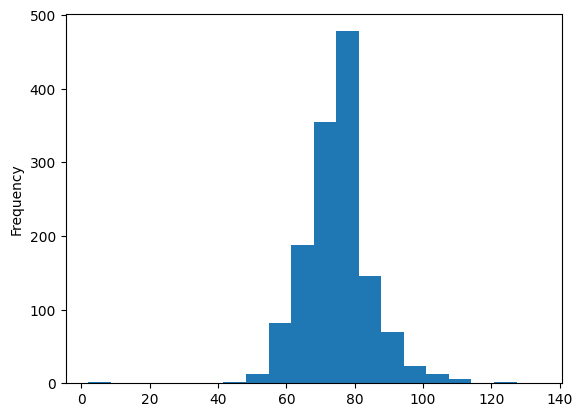

In [481]:
data[feature].plot(kind='hist', bins=20)
plt.show()

In [482]:
aux = data[feature].copy()

In [483]:
aux[aux<40]

279     8.0
1789    2.0
Name: Терапия1_П_ЗначениеПредставление, dtype: float64

In [484]:
aux.loc[[279, 1789]] = aux[aux<40]*10

In [485]:
aux.describe()

count    1380.000000
mean       75.120290
std         9.818071
min        20.000000
25%        69.000000
50%        75.000000
75%        80.000000
max       134.000000
Name: Терапия1_П_ЗначениеПредставление, dtype: float64

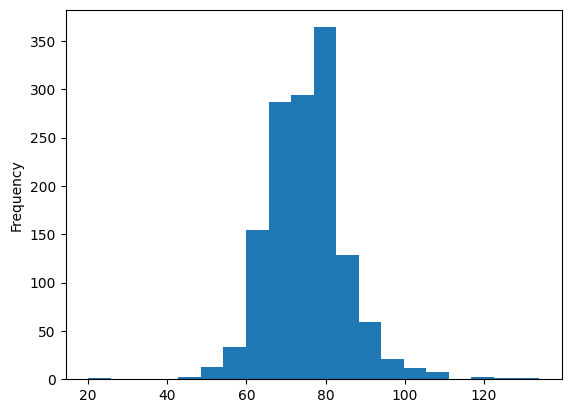

In [486]:
aux.plot(kind='hist', bins=20)
plt.show()

In [487]:
X_float = pd.concat([X_float, aux], axis=1)
X_float

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее,Терапия1_Вес_ЗначениеПредставление,Терапия1_П_ЗначениеПредставление
0,140.0,100.0,NaN,76.0
1,150.0,100.0,68.0,65.0
2,120.0,80.0,NaN,66.0
3,120.0,80.0,81.0,80.0
4,110.0,70.0,112.0,70.0
...,...,...,...,...
1961,120.0,70.0,95.0,73.0
1962,120.0,70.0,80.0,61.0
1972,125.0,80.0,75.0,90.0
1973,131.0,71.0,73.0,57.0


###### 'Терапия1_Рост_ЗначениеПредставление'

In [488]:
feature = 'Терапия1_Рост_ЗначениеПредставление'
data[feature].describe()

count    1335.000000
mean      173.517603
std        49.448998
min       142.000000
25%       165.000000
50%       172.000000
75%       178.000000
max      1633.000000
Name: Терапия1_Рост_ЗначениеПредставление, dtype: float64

In [489]:
aux = data[feature].copy()
aux

0         NaN
1       174.0
2         NaN
3       180.0
4       175.0
        ...  
1961    185.0
1962    178.0
1972    168.0
1973    170.0
1981    182.0
Name: Терапия1_Рост_ЗначениеПредставление, Length: 1571, dtype: float64

In [490]:
aux[aux>200]

1302    1633.0
1308    1183.0
Name: Терапия1_Рост_ЗначениеПредставление, dtype: float64

In [491]:
aux[aux>200] = aux[aux>200]/10

<ipython-input-491-eaa3e87a5b51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux[aux>200] = aux[aux>200]/10


In [492]:
aux.loc[[1302,1308]]

1302    163.3
1308    118.3
Name: Терапия1_Рост_ЗначениеПредставление, dtype: float64

In [493]:
aux.describe()

count    1335.000000
mean      171.619176
std         9.125962
min       118.300000
25%       165.000000
50%       172.000000
75%       178.000000
max       200.000000
Name: Терапия1_Рост_ЗначениеПредставление, dtype: float64

In [494]:
X_float = pd.concat([X_float, aux], axis=1)
X_float

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее,Терапия1_Вес_ЗначениеПредставление,Терапия1_П_ЗначениеПредставление,Терапия1_Рост_ЗначениеПредставление
0,140.0,100.0,NaN,76.0,NaN
1,150.0,100.0,68.0,65.0,174.0
2,120.0,80.0,NaN,66.0,NaN
3,120.0,80.0,81.0,80.0,180.0
4,110.0,70.0,112.0,70.0,175.0
...,...,...,...,...,...
1961,120.0,70.0,95.0,73.0,185.0
1962,120.0,70.0,80.0,61.0,178.0
1972,125.0,80.0,75.0,90.0,168.0
1973,131.0,71.0,73.0,57.0,170.0


###### 'Терапия1_ИМТ_ЗначениеПредставление'

In [495]:
feature = 'Терапия1_ИМТ_ЗначениеПредставление'
aux = data[feature].copy()
aux.describe()

count    1313.000000
mean       26.170061
std         4.943937
min         0.190000
25%        22.940000
50%        25.780000
75%        29.050000
max        49.380000
Name: Терапия1_ИМТ_ЗначениеПредставление, dtype: float64

In [496]:
X_float['Терапия1_ИМТ_ЗначениеПредставление'] = X_float['Терапия1_Вес_ЗначениеПредставление']/(X_float['Терапия1_Рост_ЗначениеПредставление']/100)**2

In [497]:
X_float['Терапия1_ИМТ_ЗначениеПредставление'].describe()

count    1333.000000
mean       26.235109
std         4.987625
min         2.524934
25%        22.992624
50%        25.777778
75%        29.053288
max        68.596466
Name: Терапия1_ИМТ_ЗначениеПредставление, dtype: float64

###### 'Терапия2_Вес_ЗначениеПредставление'

In [498]:
feature = 'Терапия2_Вес_ЗначениеПредставление'
aux = data[feature].copy()
aux.describe()

count    153.000000
mean      79.647059
std       15.400560
min       43.000000
25%       70.000000
50%       79.000000
75%       90.000000
max      115.000000
Name: Терапия2_Вес_ЗначениеПредставление, dtype: float64

In [502]:
data[['Терапия1_Вес_ЗначениеПредставление','Терапия2_Вес_ЗначениеПредставление']][data['Терапия2_Вес_ЗначениеПредставление'].notna()&data['Терапия1_Вес_ЗначениеПредставление'].isna()]

,Терапия1_Вес_ЗначениеПредставление,Терапия2_Вес_ЗначениеПредставление
29,NaN,56.0
56,NaN,48.0
147,NaN,63.0
741,NaN,53.0
770,NaN,90.0
1063,NaN,98.0
1376,NaN,60.0
1752,NaN,96.0


In [503]:
X_float['Терапия1_Вес_ЗначениеПредставление'][data['Терапия2_Вес_ЗначениеПредставление'].notna()&data['Терапия1_Вес_ЗначениеПредставление'].isna()]=data['Терапия2_Вес_ЗначениеПредставление']

In [504]:
X_float['Терапия1_Вес_ЗначениеПредставление'].describe()

count    1341.000000
mean       77.385309
std        16.263192
min         8.000000
25%        66.000000
50%        76.000000
75%        87.000000
max       153.000000
Name: Терапия1_Вес_ЗначениеПредставление, dtype: float64

###### 'Терапия2_Рост_ЗначениеПредставление'

In [505]:
feature = 'Терапия2_Рост_ЗначениеПредставление'
aux = data[feature].copy()
aux.describe()

count    153.000000
mean     170.967320
std        8.659812
min      152.000000
25%      165.000000
50%      170.000000
75%      176.000000
max      190.000000
Name: Терапия2_Рост_ЗначениеПредставление, dtype: float64

In [506]:
data[['Терапия1_Рост_ЗначениеПредставление','Терапия2_Рост_ЗначениеПредставление']][data['Терапия2_Рост_ЗначениеПредставление'].notna()&data['Терапия1_Рост_ЗначениеПредставление'].isna()]

,Терапия1_Рост_ЗначениеПредставление,Терапия2_Рост_ЗначениеПредставление
29,NaN,153.0
56,NaN,155.0
147,NaN,168.0
741,NaN,164.0
770,NaN,173.0
1063,NaN,178.0
1376,NaN,166.0
1752,NaN,178.0


In [507]:
X_float['Терапия1_Рост_ЗначениеПредставление'][data['Терапия2_Рост_ЗначениеПредставление'].notna()&data['Терапия1_Рост_ЗначениеПредставление'].isna()]=data['Терапия2_Рост_ЗначениеПредставление']

In [508]:
X_float['Терапия1_Рост_ЗначениеПредставление'].describe()

count    1343.000000
mean      171.590916
std         9.131741
min       118.300000
25%       165.000000
50%       172.000000
75%       178.000000
max       200.000000
Name: Терапия1_Рост_ЗначениеПредставление, dtype: float64

In [509]:
X_float['Терапия1_ИМТ_ЗначениеПредставление'] = X_float['Терапия1_Вес_ЗначениеПредставление']/(X_float['Терапия1_Рост_ЗначениеПредставление']/100)**2

###### Возраст (пока не бью его на группы)

In [510]:
X_age = (data['ДатаЗавершенияМедосмотра']-data['КлиентДатаРождения']).apply(lambda x: np.round(x.total_seconds()/60/60/24/365.25,2))
#X_age.apply(lambda x: x.total_seconds()/60/60/24/365.25)
X_age

0       45.25
1       34.21
2       36.44
3       33.81
4       37.85
        ...  
1961    28.92
1962    33.39
1972    35.82
1973    29.82
1981    51.22
Length: 1571, dtype: float64

In [514]:
X_float['Возраст'] = X_age
X_float

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее,Терапия1_Вес_ЗначениеПредставление,Терапия1_П_ЗначениеПредставление,Терапия1_Рост_ЗначениеПредставление,Терапия1_ИМТ_ЗначениеПредставление,Возраст
0,140.0,100.0,NaN,76.0,NaN,NaN,45.25
1,150.0,100.0,68.0,65.0,174.0,22.460034,34.21
2,120.0,80.0,NaN,66.0,NaN,NaN,36.44
3,120.0,80.0,81.0,80.0,180.0,25.000000,33.81
4,110.0,70.0,112.0,70.0,175.0,36.571429,37.85
...,...,...,...,...,...,...,...
1961,120.0,70.0,95.0,73.0,185.0,27.757487,28.92
1962,120.0,70.0,80.0,61.0,178.0,25.249337,33.39
1972,125.0,80.0,75.0,90.0,168.0,26.573129,35.82
1973,131.0,71.0,73.0,57.0,170.0,25.259516,29.82


In [584]:
X = pd.concat([X_MKB_onehot, X_no_MKB, X_float, X_adverse_factors.loc[data.index]], axis=1)
X.shape

(1571, 544)

#### LGBM with binary target

In [516]:
target_binary = target['maybe'] + target['no']
target_binary

0       0
1       0
2       1
3       0
4       1
       ..
1961    0
1962    0
1972    0
1973    0
1981    0
Length: 1571, dtype: int64

In [517]:
target_binary.value_counts()

0    1434
1     137
dtype: int64

In [520]:
model = lgbm.LGBMClassifier(is_unbalance=True)
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)

res = cross_val_score(model, X.values, target_binary.values, cv=cv)

print(res.mean())
res


0.9246316853705389


array([0.93015873, 0.92356688, 0.92356688, 0.94267516, 0.92675159,
       0.93015873, 0.91082803, 0.93312102, 0.92038217, 0.93312102,
       0.94603175, 0.92675159, 0.92993631, 0.92675159, 0.92993631,
       0.91428571, 0.91401274, 0.91719745, 0.92038217, 0.92356688,
       0.92063492, 0.93630573, 0.88853503, 0.9044586 , 0.94267516])

In [585]:
model = lgbm.LGBMClassifier(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)

res = cross_val_score(model, X.values, target_binary.values, cv=cv)

print(res.mean())
res

0.9284517237893035


array([0.93333333, 0.92675159, 0.93312102, 0.93312102, 0.92675159,
       0.93968254, 0.91082803, 0.93949045, 0.93630573, 0.92993631,
       0.93333333, 0.92993631, 0.92993631, 0.92356688, 0.92038217,
       0.92063492, 0.92675159, 0.91401274, 0.93949045, 0.93312102,
       0.92698413, 0.93949045, 0.90127389, 0.92038217, 0.94267516])

In [522]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': 'balanced',
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [586]:
base_model = lgbm.LGBMClassifier()

param_gridsearch_0 = {
    'max_depth': [5,7,9],
    'scale_pos_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model.fit(X.values, target_binary.values)

print(model.best_score_)
print(model.best_params_)

0.9348142756040846
{'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.7}


In [524]:
base_model = lgbm.LGBMClassifier()

param_gridsearch_0 = {
    'max_depth': [8,9,10],
    'scale_pos_weight': [3, 5, 7],
    'subsample': [0.6, 0.7, 0.75],
    'colsample_bytree': [0.6, 0.7, 0.75],
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.025, 0.05, 0.075]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model.fit(X.values, target_binary.values)

print(model.best_score_)
print(model.best_params_)

0.9369806895157214
{'colsample_bytree': 0.75, 'learning_rate': 0.075, 'max_depth': 9, 'n_estimators': 25, 'scale_pos_weight': 3, 'subsample': 0.6}


In [525]:
base_model = lgbm.LGBMClassifier(colsample_bytree=0.75, max_depth=9)

param_gridsearch_0 = {
    'scale_pos_weight': [2, 3, 4],
    'subsample': [0.55, 0.6, 0.65],
    'n_estimators': [20, 25, 30],
    'learning_rate': [0.07, 0.075, 0.08]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model.fit(X.values, target_binary.values)

print(model.best_score_)
print(model.best_params_)

0.9369806895157214
{'learning_rate': 0.075, 'n_estimators': 25, 'scale_pos_weight': 3, 'subsample': 0.55}


##### расширенная обработка категориальных признаков

In [526]:
X_float

,АртериальноеДавление_верхнее,АртериальноеДавление_нижнее,Терапия1_Вес_ЗначениеПредставление,Терапия1_П_ЗначениеПредставление,Терапия1_Рост_ЗначениеПредставление,Терапия1_ИМТ_ЗначениеПредставление,Возраст
0,140.0,100.0,NaN,76.0,NaN,NaN,45.25
1,150.0,100.0,68.0,65.0,174.0,22.460034,34.21
2,120.0,80.0,NaN,66.0,NaN,NaN,36.44
3,120.0,80.0,81.0,80.0,180.0,25.000000,33.81
4,110.0,70.0,112.0,70.0,175.0,36.571429,37.85
...,...,...,...,...,...,...,...
1961,120.0,70.0,95.0,73.0,185.0,27.757487,28.92
1962,120.0,70.0,80.0,61.0,178.0,25.249337,33.39
1972,125.0,80.0,75.0,90.0,168.0,26.573129,35.82
1973,131.0,71.0,73.0,57.0,170.0,25.259516,29.82


In [545]:
X_float_dummies = pd.DataFrame()
qnum=5
for elem in X_float.columns:
  qbins = pd.qcut(X_float[elem],qnum, duplicates='drop')
  qbins = pd.Series(qbins)
  dummies = pd.get_dummies(qbins, prefix=elem)
  X_float_dummies = pd.concat([X_float_dummies, dummies], axis=1)
X_float_dummies

,"АртериальноеДавление_верхнее_(89.999, 120.0]","АртериальноеДавление_верхнее_(120.0, 125.0]","АртериальноеДавление_верхнее_(125.0, 135.0]","АртериальноеДавление_верхнее_(135.0, 198.0]","АртериальноеДавление_нижнее_(19.999, 70.0]","АртериальноеДавление_нижнее_(70.0, 80.0]","АртериальноеДавление_нижнее_(80.0, 85.0]","АртериальноеДавление_нижнее_(85.0, 120.0]","Терапия1_Вес_ЗначениеПредставление_(7.999, 63.0]","Терапия1_Вес_ЗначениеПредставление_(63.0, 72.0]",...,"Терапия1_ИМТ_ЗначениеПредставление_(2.524, 22.097]","Терапия1_ИМТ_ЗначениеПредставление_(22.097, 24.609]","Терапия1_ИМТ_ЗначениеПредставление_(24.609, 26.827]","Терапия1_ИМТ_ЗначениеПредставление_(26.827, 29.761]","Терапия1_ИМТ_ЗначениеПредставление_(29.761, 68.596]","Возраст_(16.259, 30.43]","Возраст_(30.43, 36.99]","Возраст_(36.99, 43.61]","Возраст_(43.61, 53.27]","Возраст_(53.27, 71.89]"
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1962,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1972,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1973,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [546]:
X_broad = pd.concat([X_MKB_onehot, X_no_MKB, X_float, X_float_dummies], axis=1)
X_broad.shape

(1571, 485)

In [547]:
model_broad = lgbm.LGBMClassifier(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)

res = cross_val_score(model_broad, X_broad.values, target_binary.values, cv=cv)

print(res.mean())
res

0.9275595996360328


array([0.93333333, 0.92675159, 0.91082803, 0.94267516, 0.93949045,
       0.94285714, 0.92038217, 0.93949045, 0.92038217, 0.92675159,
       0.94285714, 0.92993631, 0.93630573, 0.92675159, 0.92675159,
       0.91746032, 0.91401274, 0.92038217, 0.92675159, 0.93630573,
       0.92063492, 0.93312102, 0.89490446, 0.91719745, 0.94267516])

In [548]:
base_model = lgbm.LGBMClassifier()

param_gridsearch_0 = {
    'max_depth': [5,7,9],
    'scale_pos_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model_broad = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model_broad.fit(X_broad.values, target_binary.values)

print(model_broad.best_score_)
print(model_broad.best_params_)

0.9369806895157214
{'learning_rate': 0.075, 'n_estimators': 25, 'scale_pos_weight': 3, 'subsample': 0.55}


In [549]:
print(model_broad.best_score_)
print(model_broad.best_params_)

0.9316360327570519
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.7}


In [550]:
base_model = lgbm.LGBMClassifier()

param_gridsearch_0 = {
    'max_depth': [8,9,10],
    'scale_pos_weight': [3, 5, 7],
    'subsample': [0.65, 0.7, 0.75],
    'colsample_bytree': [0.65, 0.7, 0.75],
    'n_estimators': [25, 50, 75],
    'learning_rate': [0.025, 0.05, 0.075]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model_broad = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model_broad.fit(X_broad.values, target_binary.values)

print(model_broad.best_score_)
print(model_broad.best_params_)

0.9367251036295623
{'colsample_bytree': 0.7, 'learning_rate': 0.025, 'max_depth': 9, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 0.65}


In [551]:
base_model = lgbm.LGBMClassifier(colsample_bytree=0.7, max_depth=9, n_estimators=50, scale_pos_weight=5)

param_gridsearch_0 = {

    'subsample': [0.55, 0.6, 0.65],
    'learning_rate': [0.02, 0.025, 0.03]

}

cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
model_broad = GridSearchCV(estimator = base_model, param_grid = param_gridsearch_0, cv = cv, n_jobs = 3, scoring = 'accuracy')
model_broad.fit(X_broad.values, target_binary.values)

print(model_broad.best_score_)
print(model_broad.best_params_)

0.9367251036295623
{'learning_rate': 0.025, 'subsample': 0.55}


###### Лучшая точность DM: 0.937

#### Neural network

In [566]:
X_MKB_onehot.isna().sum().sum()

0

In [567]:
X_no_MKB.isna().sum().sum()

0

In [568]:
X_float.isna().sum().sum()

1243

In [569]:
rep_dict = {elem: X_float[elem].mean() for elem in X_float.columns}
rep_dict

{'АртериальноеДавление_верхнее': 126.99424046076314,
 'АртериальноеДавление_нижнее': 79.54974802015839,
 'Терапия1_Вес_ЗначениеПредставление': 77.38530947054437,
 'Терапия1_П_ЗначениеПредставление': 75.12028985507246,
 'Терапия1_Рост_ЗначениеПредставление': 171.5909158600149,
 'Терапия1_ИМТ_ЗначениеПредставление': 26.226997222568986,
 'Возраст': 41.43281985996181}

In [574]:
X_float = X_float.fillna(value=rep_dict)

In [575]:
scaler = StandardScaler()
X_float_norm = scaler.fit_transform(X_float)

In [587]:
X_nn = np.concatenate((X_MKB_onehot, X_no_MKB, X_adverse_factors.loc[data.index], X_float_norm), axis=1)
X_nn.shape

(1571, 544)

In [577]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(25, input_dim=X_nn.shape[1], activation='relu'))
	#model.add(Dropout(0.25))
	#model.add(BatchNormalization())
	#model.add(Dense(25, activation='relu'))
	#model.add(Dropout(0.25))
	#model.add(BatchNormalization())
	model.add(Dense(10, activation='relu'))
	#model.add(Dropout(0.25))
	#model.add(BatchNormalization())	
	model.add(Dense(1, activation='sigmoid'))
 
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [578]:
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
estimator = KerasClassifier(model=baseline_model, epochs=200, batch_size=10, verbose=0)
res = cross_val_score(estimator, X_nn, target_binary.values, cv=cv)

print(res.mean())
res

0.9131800626832474


array([0.92698413, 0.92993631, 0.92675159, 0.90764331, 0.92038217,
       0.9015873 , 0.88216561, 0.92356688, 0.91401274, 0.92993631,
       0.89206349, 0.92356688, 0.92038217, 0.90764331, 0.92993631,
       0.90793651, 0.91082803, 0.91719745, 0.88535032, 0.92038217,
       0.90793651, 0.92356688, 0.87898089, 0.92038217, 0.92038217])

In [588]:
# define baseline model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Dense(100, input_dim=X_nn.shape[1], activation='relu'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  #model.add(Dense(25, activation='relu'))
  #model.add(Dropout(0.25))
  #model.add(BatchNormalization())
  model.add(Dense(10, activation='relu'))
  #model.add(Dropout(0.25))
  #model.add(BatchNormalization())	
  model.add(Dense(1, activation='sigmoid'))
 
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [589]:
cv = RepeatedStratifiedKFold(n_repeats=5, random_state=42)
estimator = KerasClassifier(model=baseline_model, epochs=200, batch_size=10, verbose=0)
res = cross_val_score(estimator, X_nn, target_binary.values, cv=cv)

print(res.mean())
res

0.8922373875240117


array([0.4       , 0.92038217, 0.92038217, 0.91401274, 0.92038217,
       0.90793651, 0.91719745, 0.90764331, 0.93630573, 0.91401274,
       0.85714286, 0.9044586 , 0.92356688, 0.92356688, 0.90764331,
       0.86984127, 0.93312102, 0.89171975, 0.92675159, 0.91082803,
       0.9015873 , 0.94904459, 0.88535032, 0.92993631, 0.93312102])

# Конец

# Дальнейшие планы:

*   строить ML и DL модели по более широкому набору признаков
*   пробовать более сложные архитектуры нейронок
*   (?) обработка текстовых полей (напр. профессия)






